In [2]:
melbourne.data <- read.csv("E:\\project\\melborne1.csv",header = TRUE,
                           stringsAsFactors = FALSE,
                           strip.white = TRUE,
                           sep = ",",
                           na.strings = c("","NA"))
str(melbourne.data)

'data.frame':	14246 obs. of  19 variables:
 $ Suburb      : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address     : chr  "68 Studley St" "85 Turner St" "25 Bloomburg St" "18/659 Victoria St" ...
 $ Rooms       : int  2 2 2 3 3 3 4 4 2 2 ...
 $ Type        : chr  "h" "h" "h" "u" ...
 $ Price       : int  NA 1480000 1035000 NA 1465000 850000 1600000 NA NA NA ...
 $ Method      : chr  "SS" "S" "S" "VB" ...
 $ SellerG     : chr  "Jellis" "Biggin" "Biggin" "Rounds" ...
 $ Date        : chr  "03-09-2016" "03-12-2016" "04-02-2016" "04-02-2016" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : int  2 2 2 3 3 3 3 3 4 3 ...
 $ Bathroom    : int  1 1 1 2 2 2 1 2 1 2 ...
 $ Car         : int  1 1 0 1 0 1 2 2 2 1 ...
 $ Landsize    : int  126 202 156 0 134 94 120 400 201 202 ...
 $ BuildingArea: num  NA NA 79 NA 150 NA 142 220 NA NA ...
 $ YearBuilt   : int  NA NA 1

In [3]:
library("dplyr")
library("utils")
library("Amelia")
library("VIM")
library("openxlsx")
library("psych")
library("dummies")

Warning message:
"package 'dplyr' was built under R version 3.5.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'Amelia' was built under R version 3.5.2"Loading required package: Rcpp
Warning message:
"package 'Rcpp' was built under R version 3.5.2"## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2019 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 
Warning message:
"package 'VIM' was built under R version 3.5.2"Loading required package: colorspace
Warning message:
"package 'colorspace' was built under R version 3.5.2"Loading required package: grid
Loading required package: data.table
Warning message:
"package 'data.table' was built under R version 3.5.2"
Attaching package: 'data.table'

The foll

In [5]:
summary(melbourne.data)

    Suburb            Address              Rooms            Type          
 Length:14246       Length:14246       Min.   : 1.000   Length:14246      
 Class :character   Class :character   1st Qu.: 2.000   Class :character  
 Mode  :character   Mode  :character   Median : 3.000   Mode  :character  
                                       Mean   : 2.894                     
                                       3rd Qu.: 3.000                     
                                       Max.   :12.000                     
                                       NA's   :24                         
     Price            Method            SellerG              Date          
 Min.   :  85000   Length:14246       Length:14246       Length:14246      
 1st Qu.: 640000   Class :character   Class :character   Class :character  
 Median : 900000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1076961                                                           
 3rd Qu.:1330500    


tail(melbourne.data,10) 

In [10]:
 summary(modified.md)

     Rooms            Type               Price            Method         
 Min.   : 1.000   Length:14246       Min.   :  85000   Length:14246      
 1st Qu.: 2.000   Class :character   1st Qu.: 640000   Class :character  
 Median : 3.000   Mode  :character   Median : 900000   Mode  :character  
 Mean   : 2.894                      Mean   :1076961                     
 3rd Qu.: 3.000                      3rd Qu.:1330500                     
 Max.   :12.000                      Max.   :8000000                     
 NA's   :24                          NA's   :3177                        
     Date              Distance         Postcode       Bedroom2     
 Length:14246       Min.   : 1.200   Min.   :3000   Min.   : 0.000  
 Class :character   1st Qu.: 5.900   1st Qu.:3046   1st Qu.: 2.000  
 Mode  :character   Median : 8.800   Median :3085   Median : 3.000  
                    Mean   : 8.622   Mean   :3098   Mean   : 2.841  
                    3rd Qu.:11.200   3rd Qu.:3146   3rd Qu.: 3.

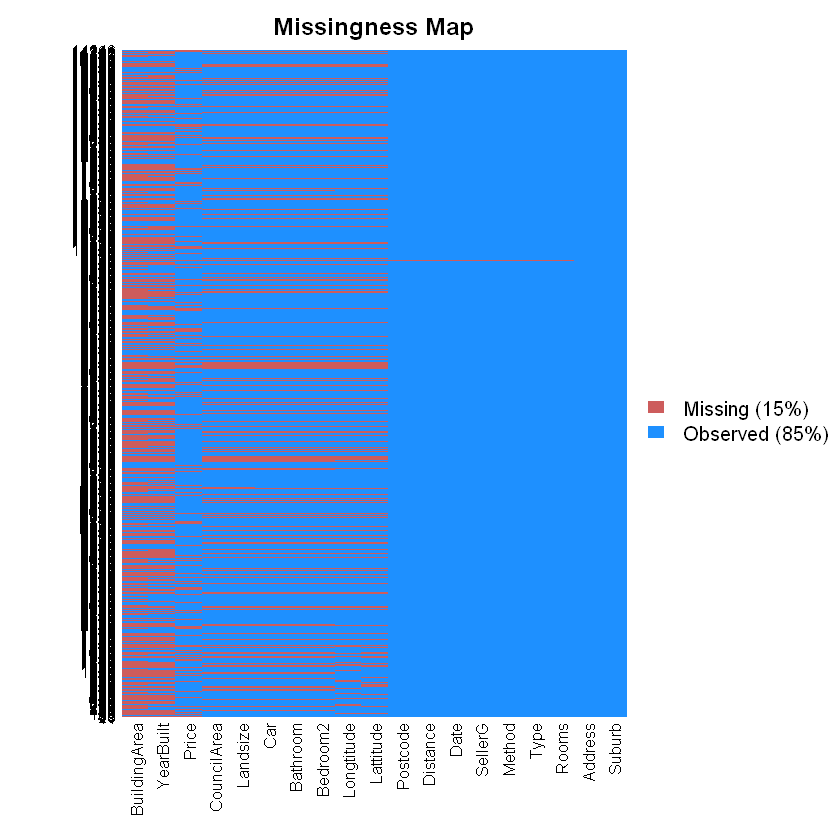

In [11]:
 library("Amelia")
 missmap(melbourne.data)

Warning message in plot.aggr(res, ...):
"not enough vertical space to display frequencies (too many combinations)"

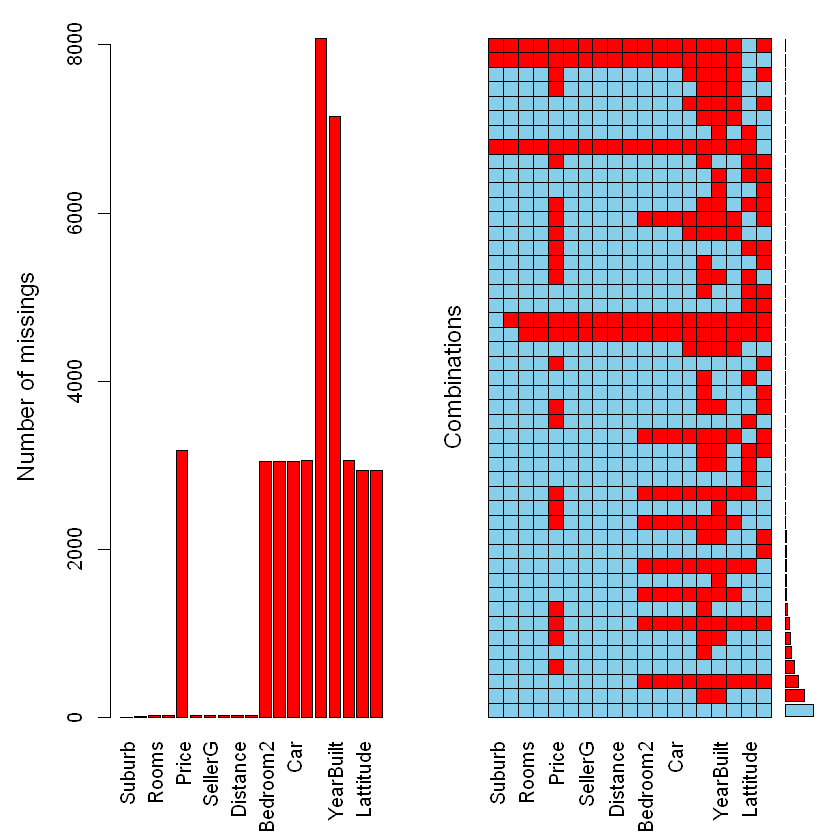

In [12]:
 library("VIM")
 aggr(melbourne.data,prop=F,numbers=T)

In [15]:
summary((melbourne.data$Bedroom2))
 table(melbourne.data$Bedroom2)
melbourne.data$Bedroom2[is.na(melbourne.data$Bedroom2)]<- 3

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   3.000   2.875   3.000  30.000 


   0    1    2    3    4    5    6    7    8    9   20   30 
  13  667 3490 7637 1930  448   42    8    5    4    1    1 

Warning message in plot.aggr(res, ...):
"not enough vertical space to display frequencies (too many combinations)"

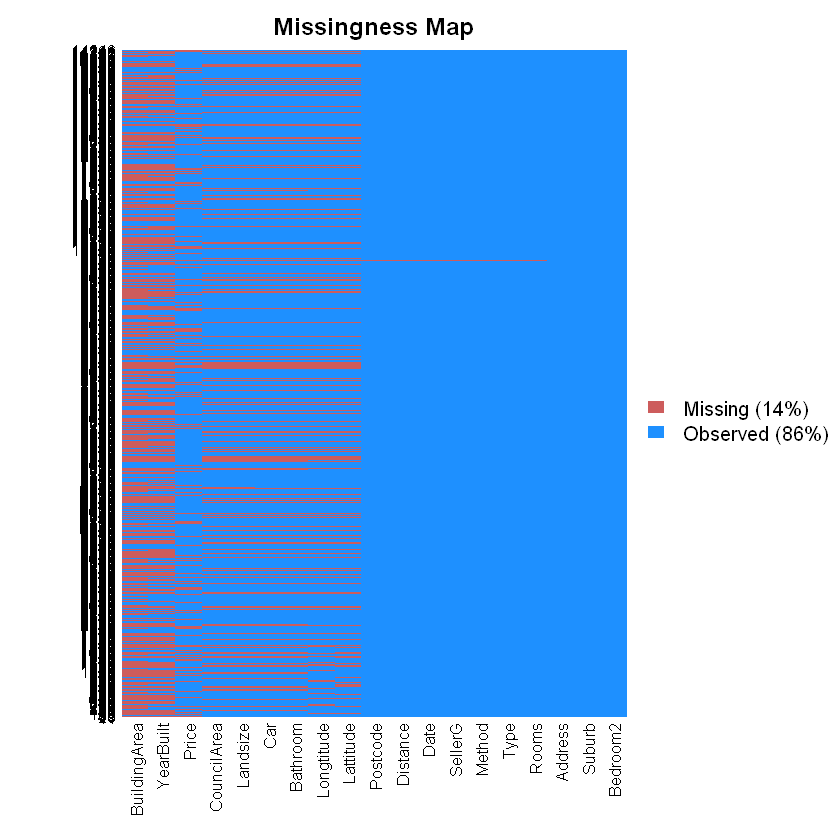

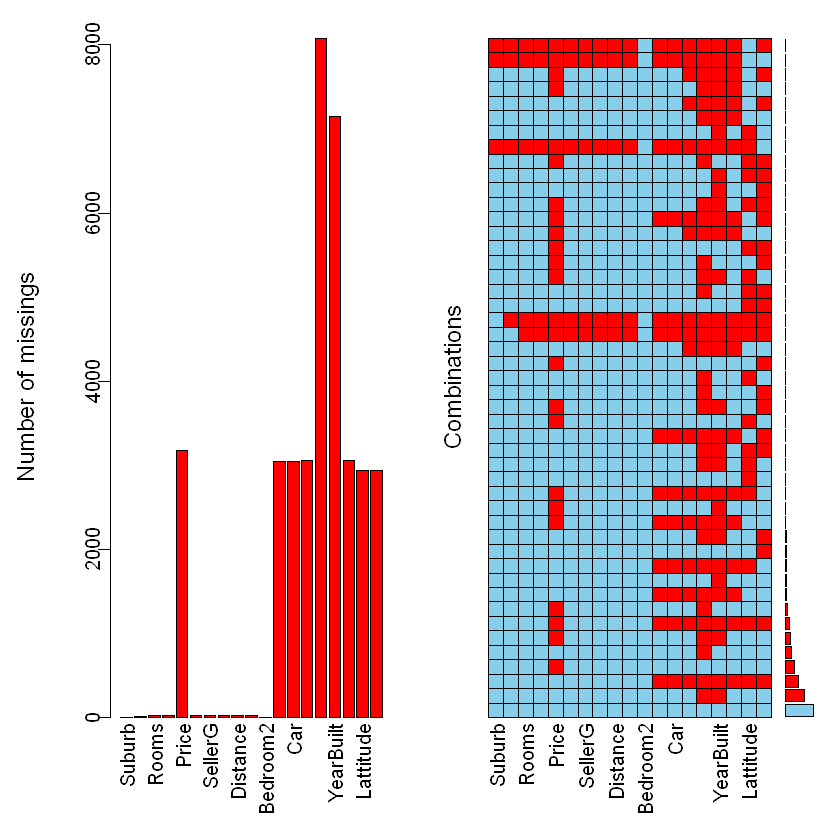

In [17]:
missmap(melbourne.data)
 aggr(melbourne.data,prop=F,numbers=T)

[1] 1076961

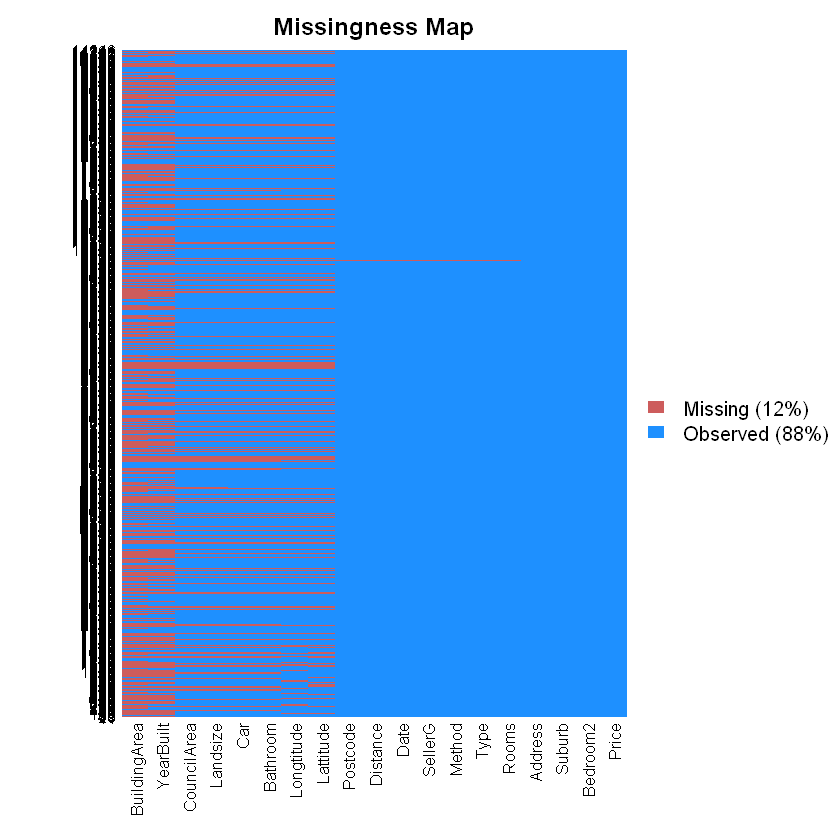

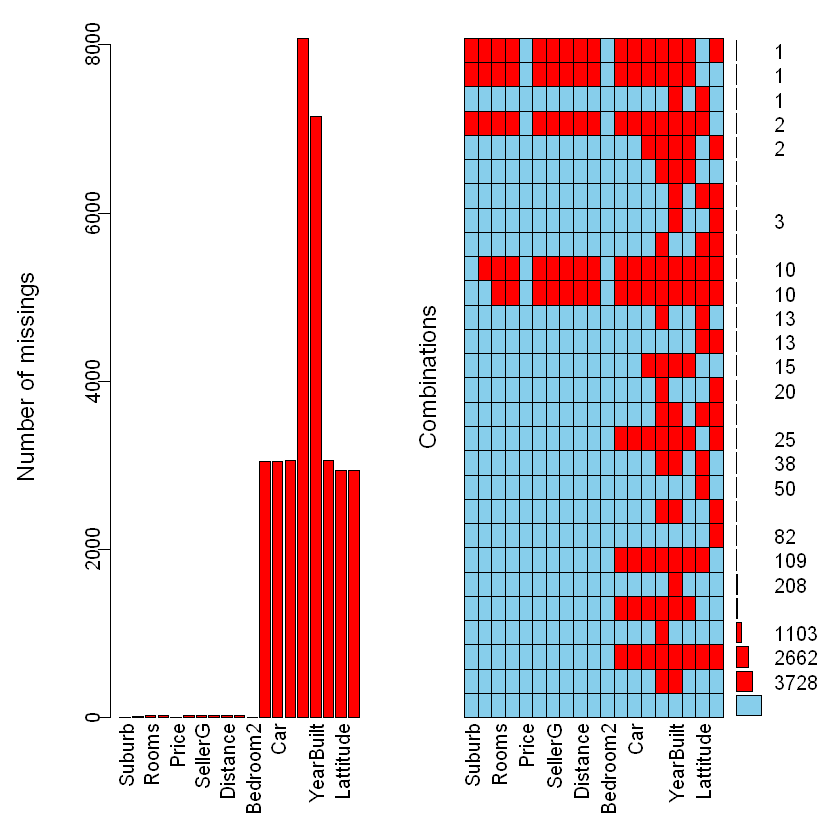

In [21]:
mean(melbourne.data$Price,na.rm=TRUE)
melbourne.data$Price[is.na(melbourne.data$Price)]<- mean(melbourne.data$Price,na.rm=TRUE)#replacing with mean
missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)

[1] 469.1814

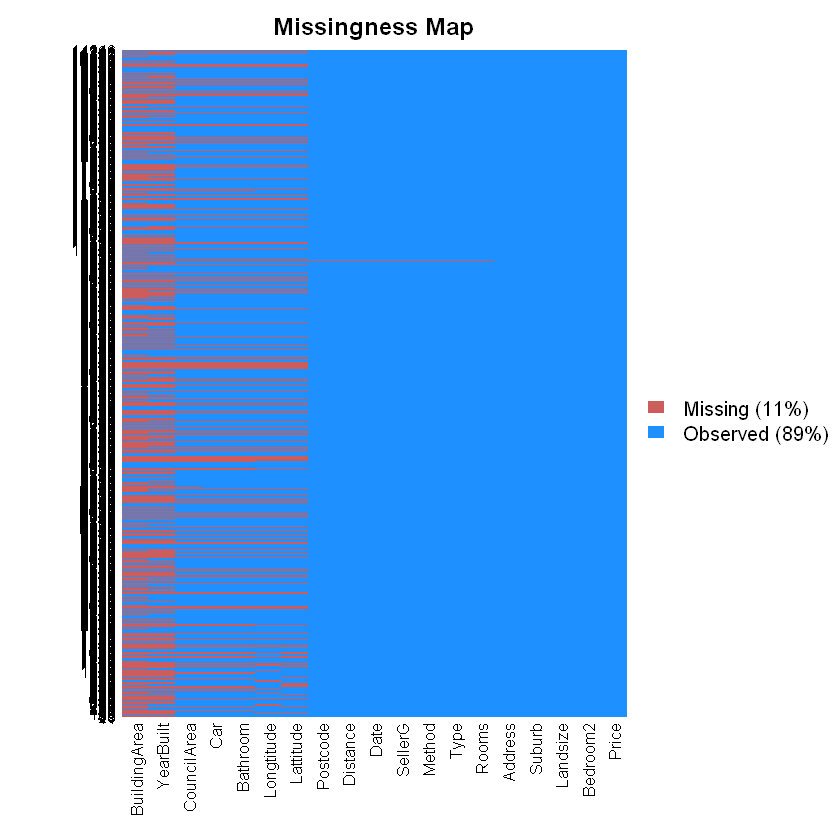

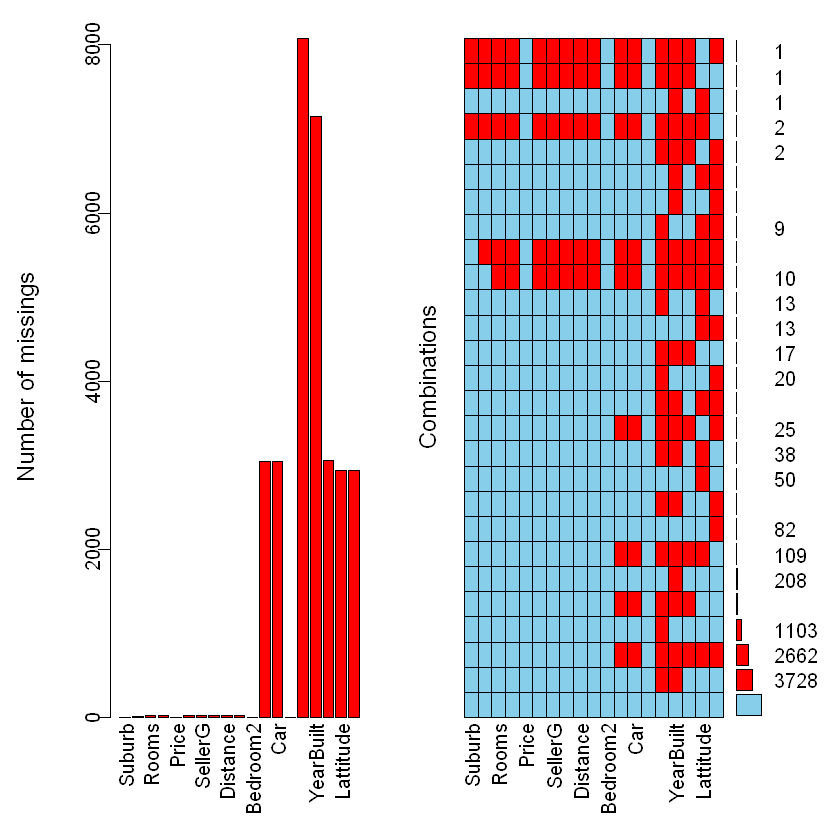

In [22]:
mean(melbourne.data$Landsize,na.rm=TRUE)
melbourne.data$Landsize[is.na(melbourne.data$Landsize)]<- mean(melbourne.data$Landsize,na.rm=TRUE)#replacing with mean
missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)

[1] 146.8615

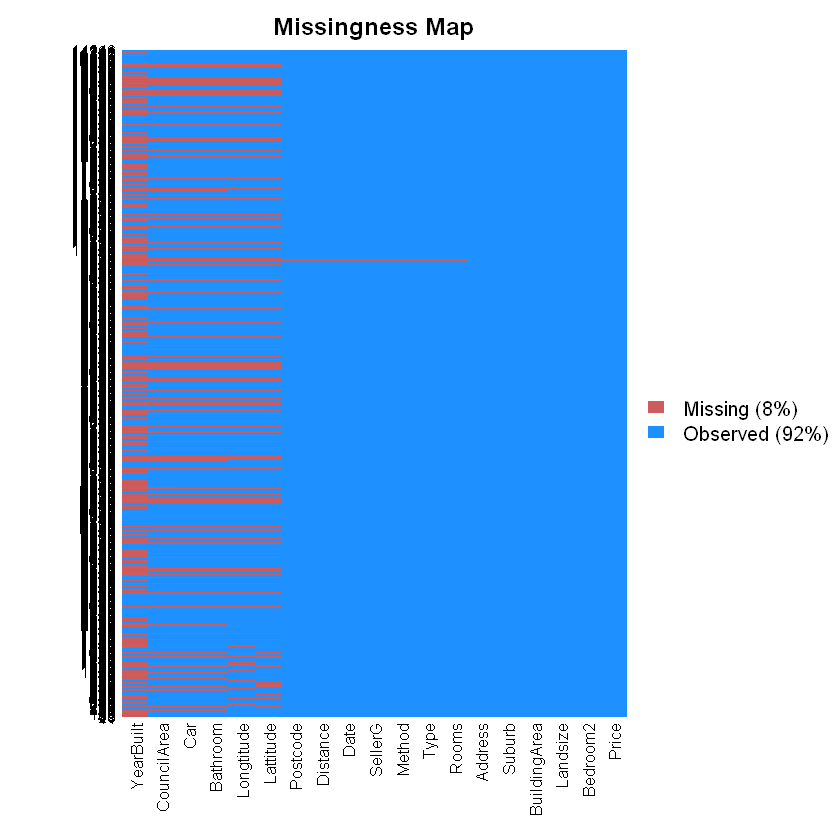

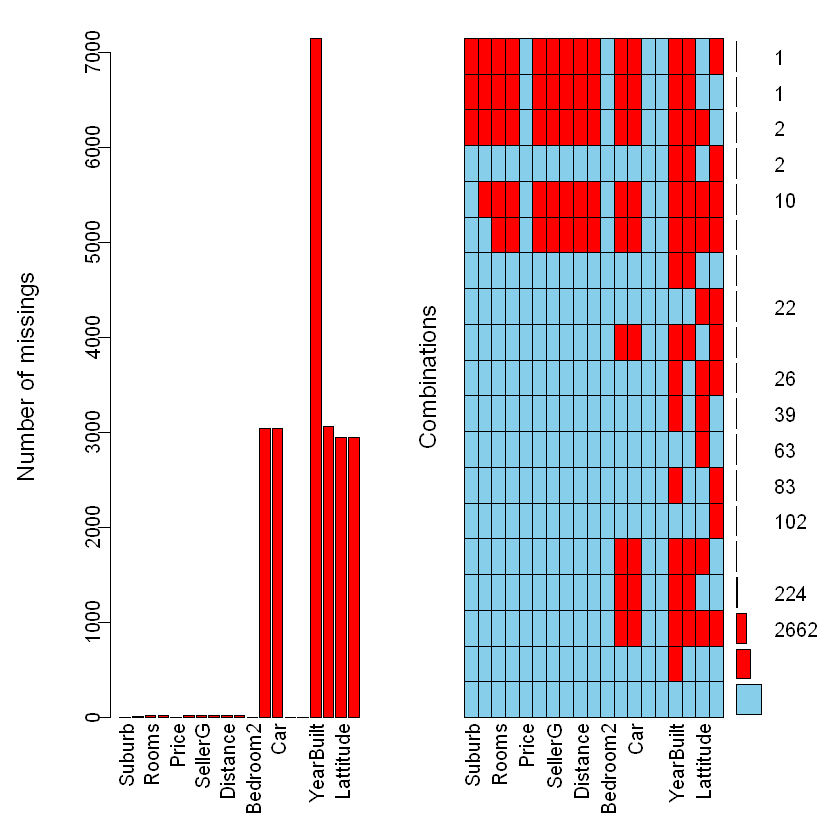

In [23]:
mean(melbourne.data$BuildingArea,na.rm=TRUE)
melbourne.data$BuildingArea[is.na(melbourne.data$BuildingArea)]<- mean(melbourne.data$BuildingArea,na.rm=TRUE)#replacing with mean
missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)


1800 1830 1850 1854 1856 1857 1860 1863 1868 1870 1872 1875 1876 1877 1880 1881 
   1    1    4    1    1    1    4    2    1    2    2    1    1    1   86    1 
1883 1884 1885 1886 1887 1888 1889 1890 1892 1893 1894 1895 1896 1897 1898 1900 
   1    1    8    4    3   10    1  253    1    2    1    4    1    1    2  365 
1901 1902 1903 1904 1905 1906 1907 1908 1910 1911 1912 1913 1914 1915 1916 1917 
   1    2    2    4   25    4    2    3  256    2    7    4    1   64    4    3 
1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 
   4    4  301    2    3    7    5  104    8    9   13    3  300    2    1    1 
1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1945 1946 1947 1948 1949 1950 
   7   57    1    4   20    5  229    5    1    4   34    3    4   15    5  536 
1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 
   5    3    4    1   77    7    7   10    3  580    4    5    7    4  131   15 
1967 1968 1969 1970 1971 19

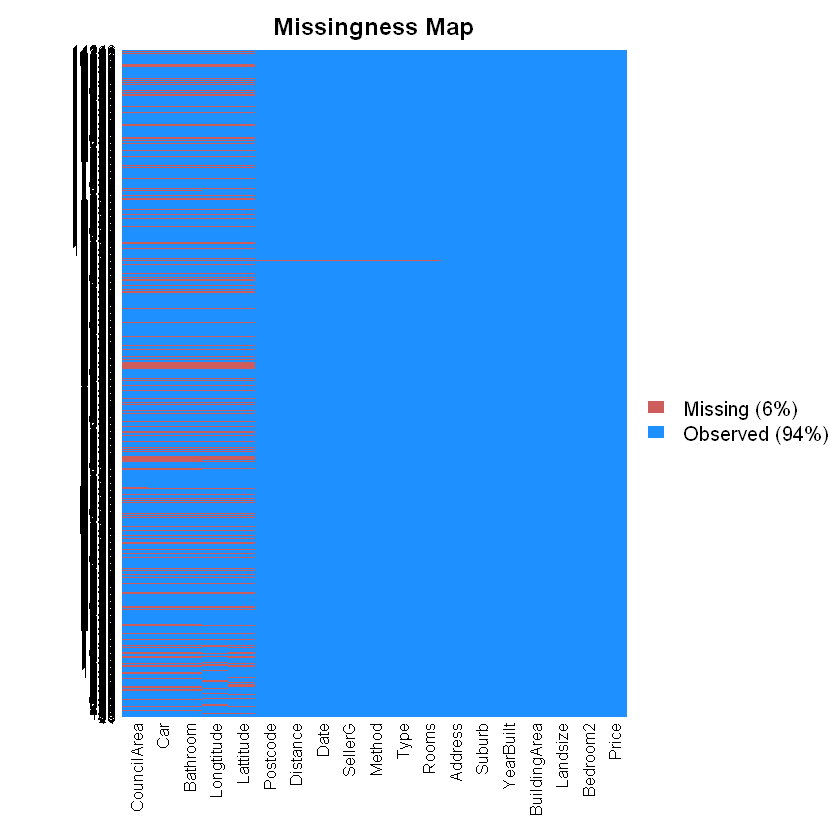

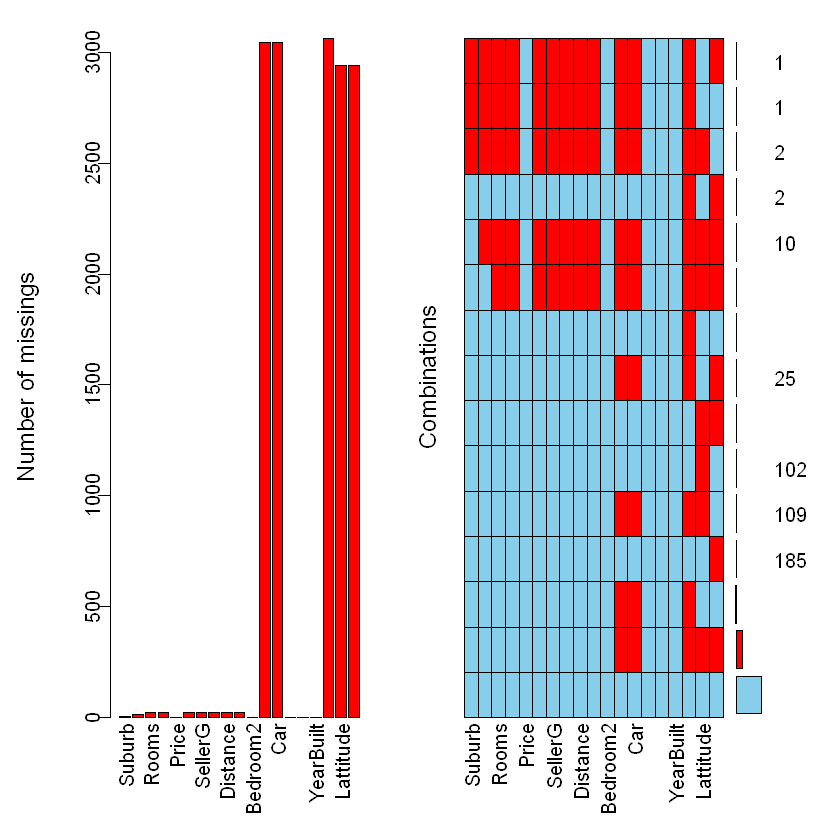

In [24]:
table(melbourne.data$YearBuilt)
melbourne.data$YearBuilt[is.na(melbourne.data$YearBuilt)]<-1970
 missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)


   0    1    2    3    4    5    6    7    8   11   26 
 954 4924 4307  557  373   41   30    8    6    1    1 

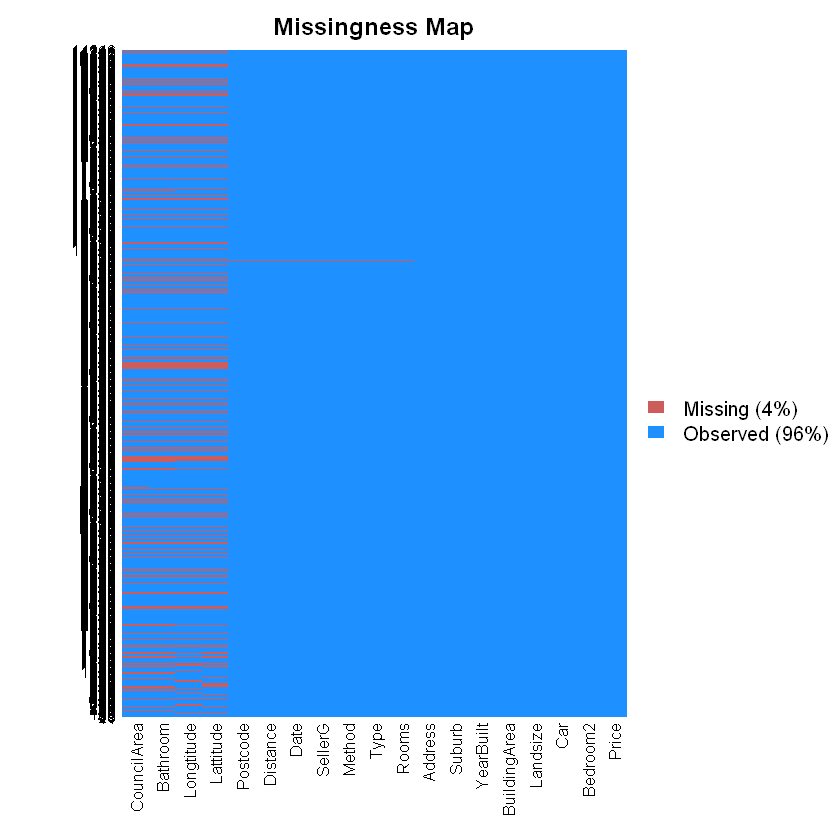

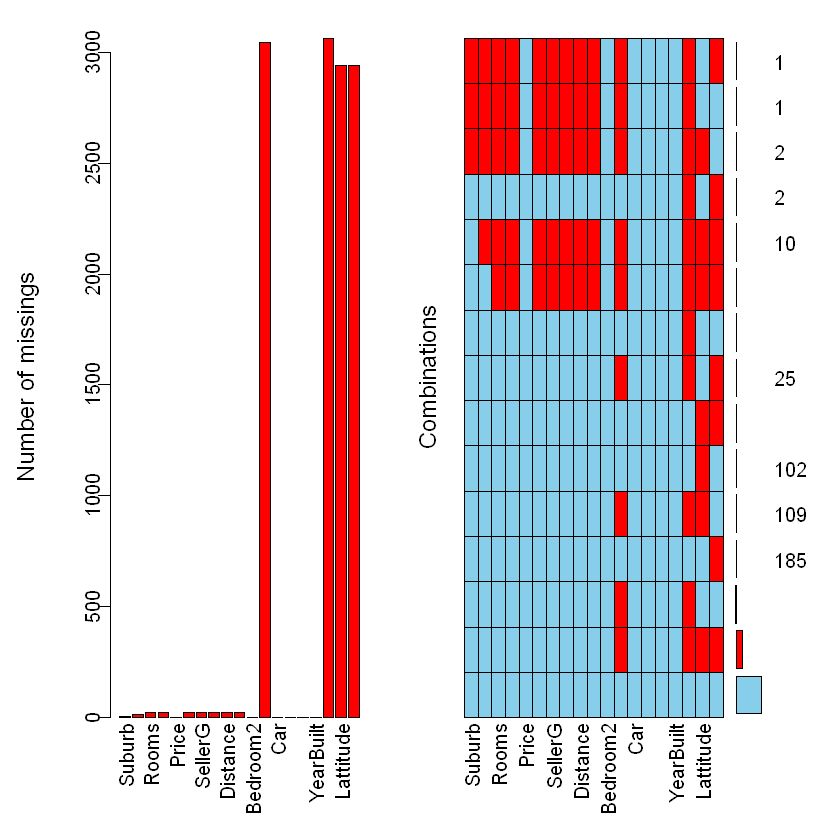

In [25]:
table(melbourne.data$Car)
melbourne.data$Car[is.na(melbourne.data$Car)]<- 1
missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)


   0    1    2    3    4    5    6    7    8   12 
  40 6319 3898  803  105   28    4    3    1    1 

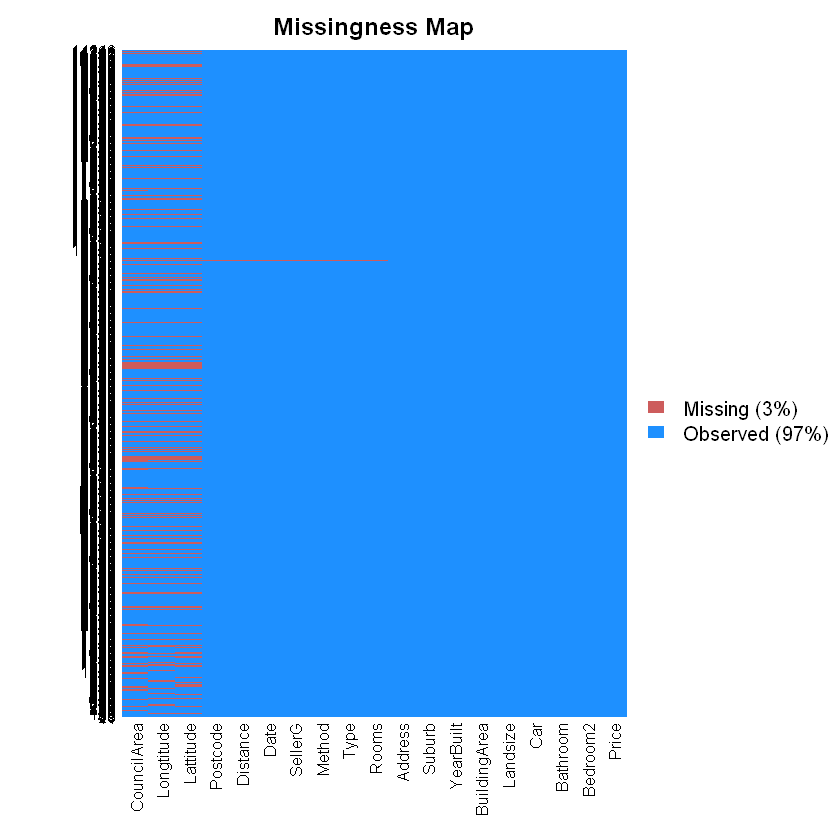

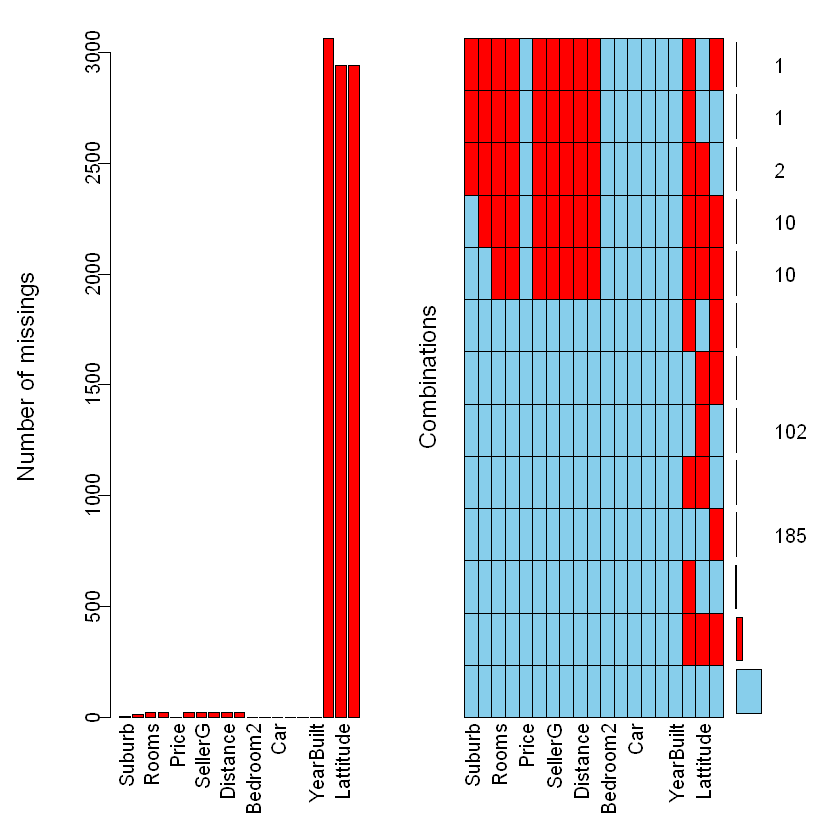

In [26]:
table(melbourne.data$Bathroom)
melbourne.data$Bathroom[is.na(melbourne.data$Bathroom)]<- 1
missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)


   1    2    3    4    5    6    7    8    9   10   12 
 801 4197 5800 2707  629   60   10   11    2    3    2 

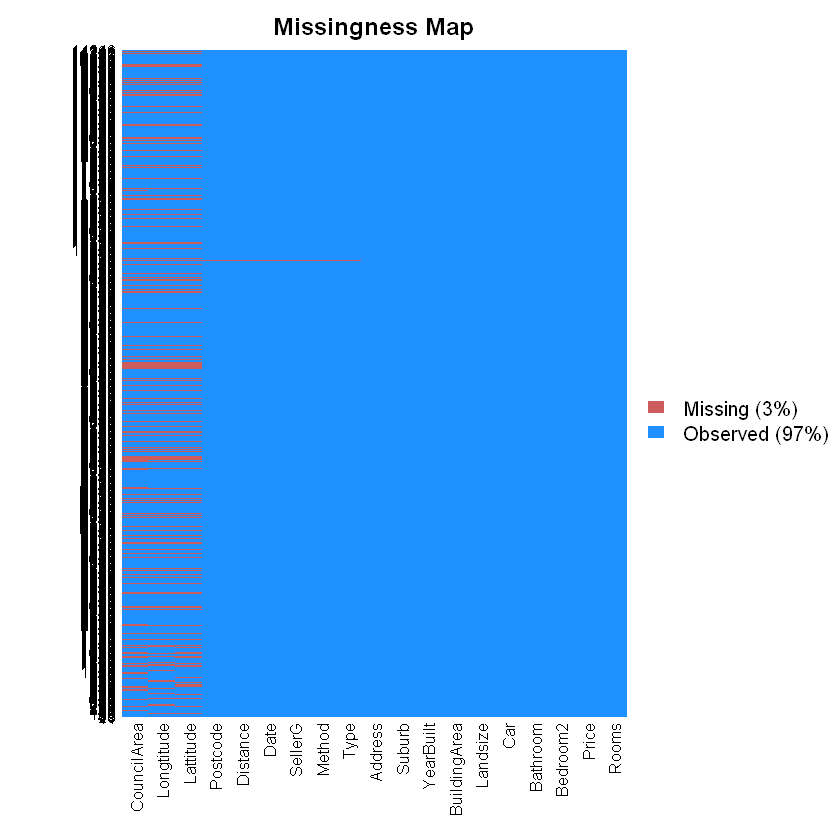

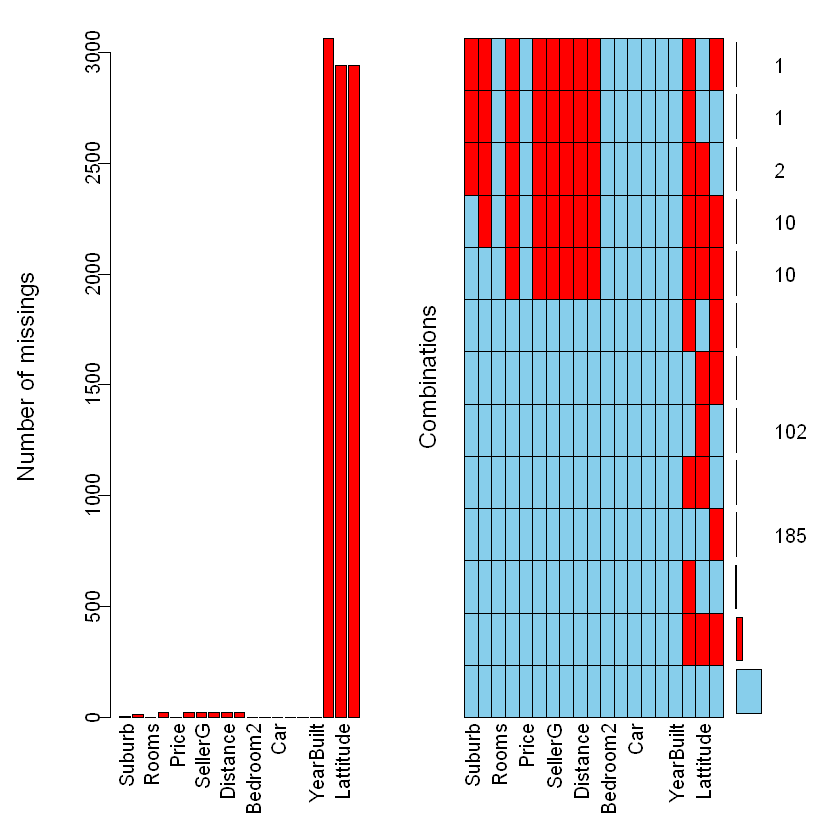

In [27]:
table(melbourne.data$Rooms)
melbourne.data$Rooms[is.na(melbourne.data$Rooms)]<- 3
 missmap(melbourne.data)
 aggr(melbourne.data,prop=F,numbers=T)

[1] 8.621635

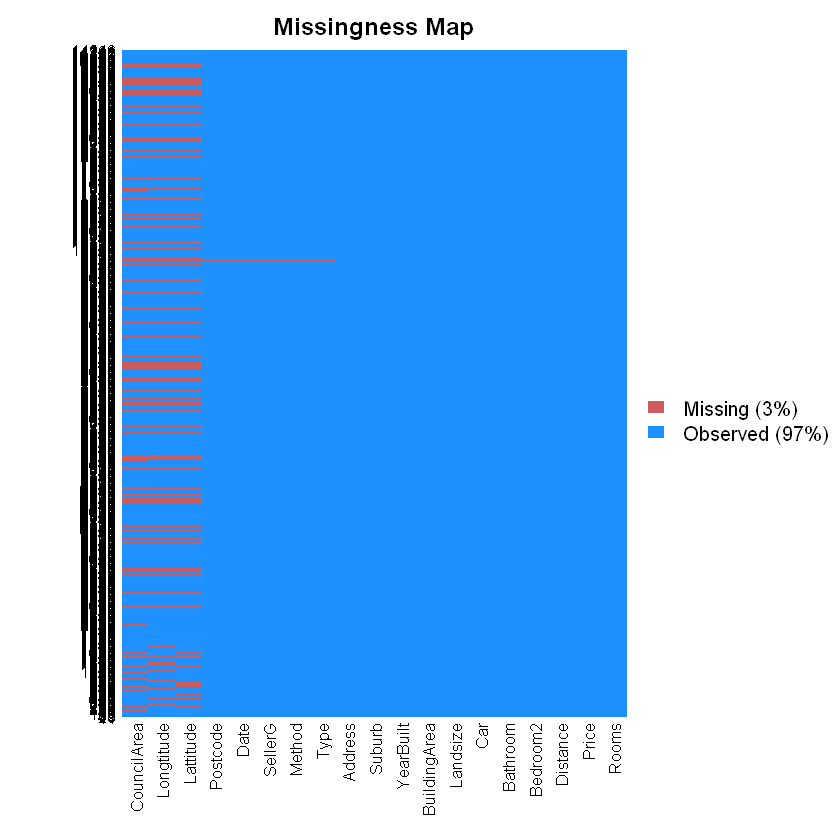

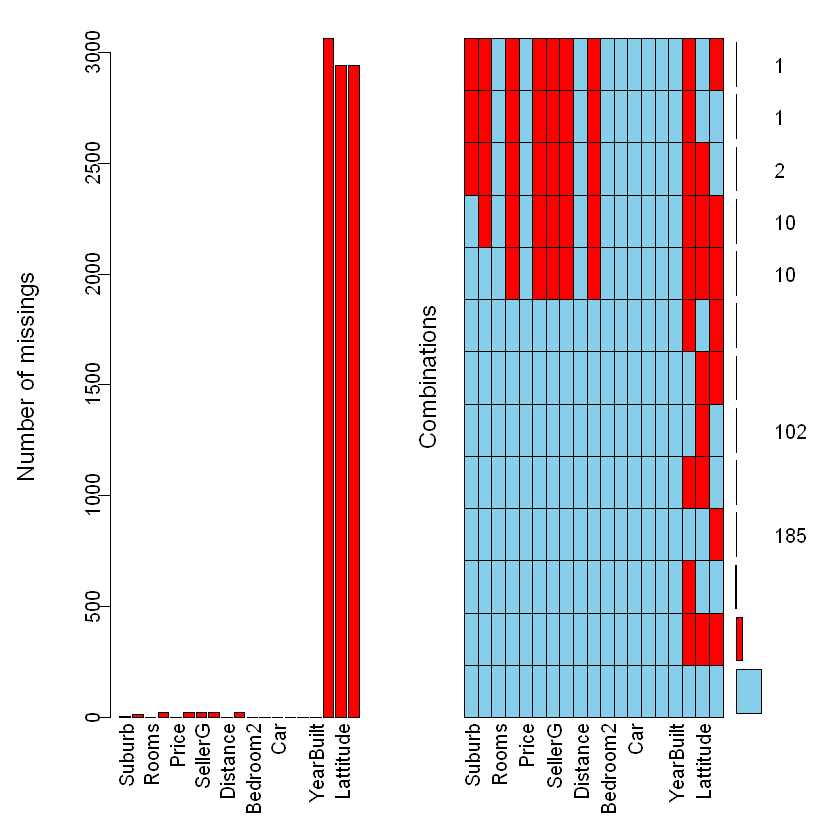

In [28]:
 mean(melbourne.data$Distance,na.rm=TRUE);
melbourne.data$Distance[is.na(melbourne.data$Distance)] <- mean(melbourne.data$Distance,na.rm=TRUE)
 missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)


   h    t    u 
9104 1574 3568 

[1] 0

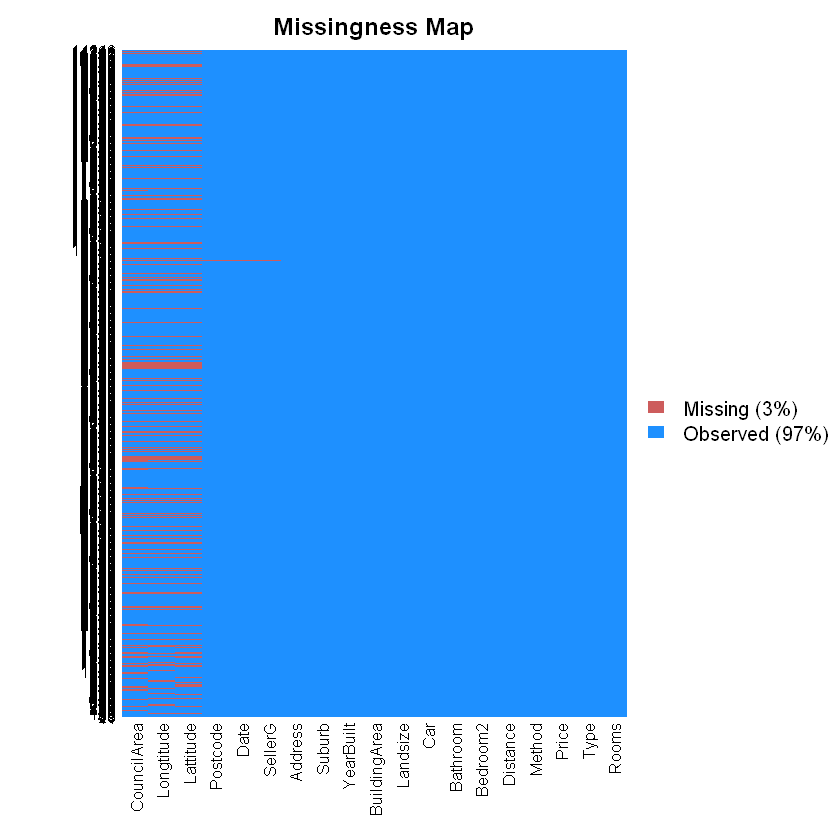

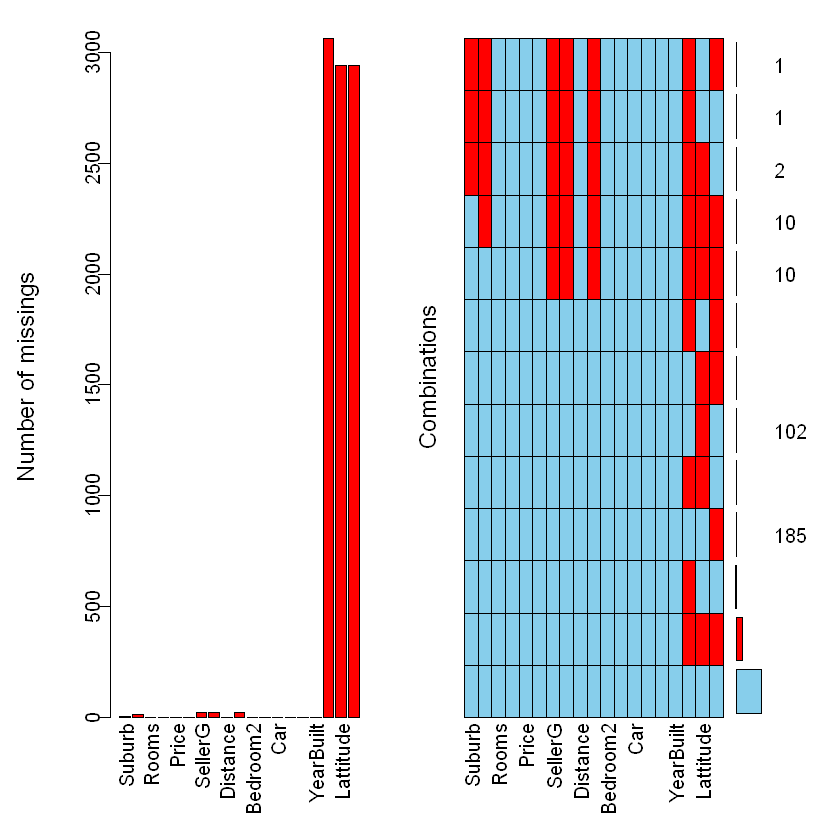

In [39]:
table(melbourne.data$Type)
sum(is.na(melbourne.data[, c("Type")]))
melbourne.data$Type[is.na(melbourne.data$Type)] <- 'h'
missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)


[1] 0


   h   PI   PN    S   SA   SN   SP   SS   VB    W 
  24 1883  121 8406   51  587 2013   12 1098   51 

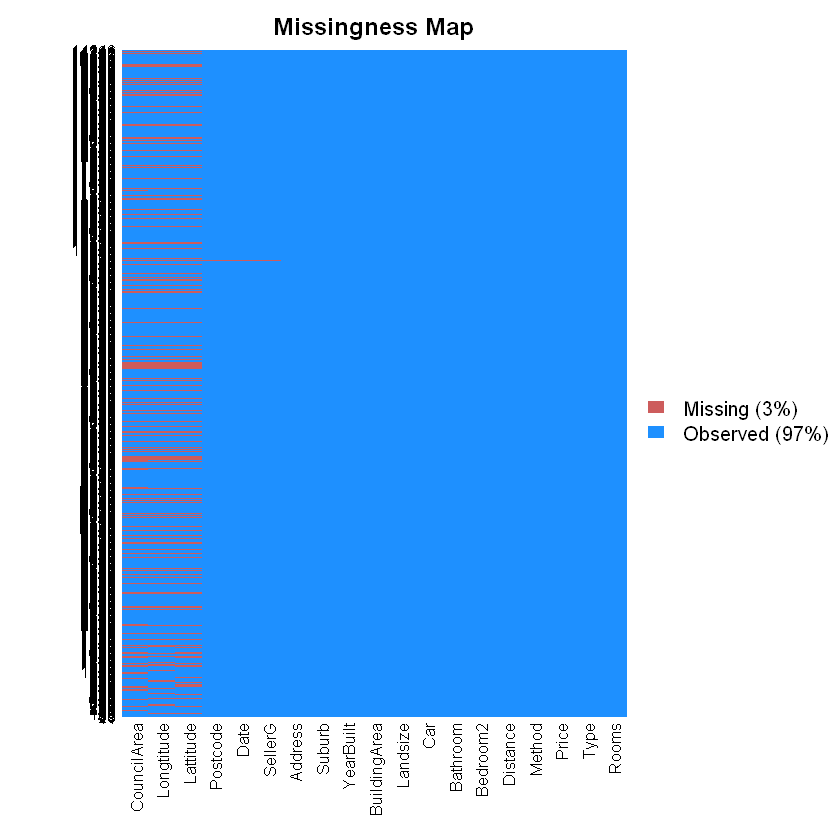

'data.frame':	14246 obs. of  19 variables:
 $ Suburb      : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address     : chr  "68 Studley St" "85 Turner St" "25 Bloomburg St" "18/659 Victoria St" ...
 $ Rooms       : num  2 2 2 3 3 3 4 4 2 2 ...
 $ Type        : chr  "h" "h" "h" "u" ...
 $ Price       : num  1076961 1480000 1035000 1076961 1465000 ...
 $ Method      : chr  "SS" "S" "S" "VB" ...
 $ SellerG     : chr  "Jellis" "Biggin" "Biggin" "Rounds" ...
 $ Date        : chr  "03-09-2016" "03-12-2016" "04-02-2016" "04-02-2016" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : num  2 2 2 3 3 3 3 3 4 3 ...
 $ Bathroom    : num  1 1 1 2 2 2 1 2 1 2 ...
 $ Car         : num  1 1 0 1 0 1 2 2 2 1 ...
 $ Landsize    : num  126 202 156 0 134 94 120 400 201 202 ...
 $ BuildingArea: num  147 147 79 147 150 ...
 $ YearBuilt   : num  1970 1970 1900 1970 1900 ...
 $ Cou

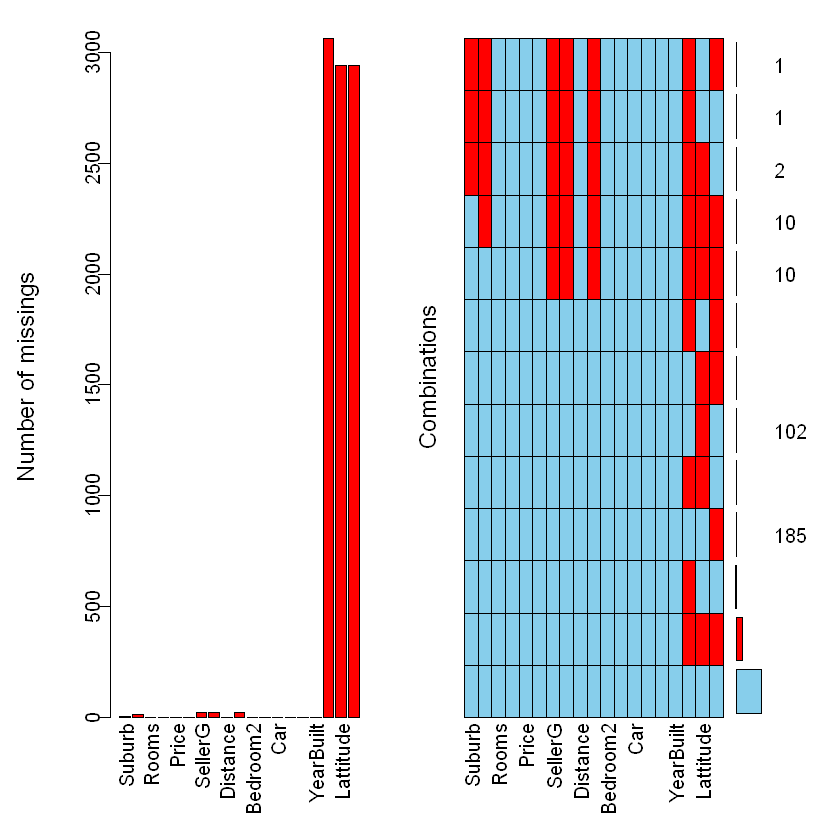

In [41]:
 sum(is.na(melbourne.data[, c("Method")]))
 table(melbourne.data$Method)
melbourne.data$Method[is.na(melbourne.data$Method)]<- 'S'
 missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)
str(melbourne.data)

In [42]:
 modified.md <- melbourne.data[c(-1,-2,-7)]
modified.md

Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude
2,h,1076961,SS,03-09-2016,2.5,3067,2,1,1,126.0000,146.8615,1970,Yarra,-37.8014,144.9958
2,h,1480000,S,03-12-2016,2.5,3067,2,1,1,202.0000,146.8615,1970,Yarra,-37.7996,144.9984
2,h,1035000,S,04-02-2016,2.5,3067,2,1,0,156.0000,79.0000,1900,Yarra,-37.8079,144.9934
3,u,1076961,VB,04-02-2016,2.5,3067,3,2,1,0.0000,146.8615,1970,Yarra,-37.8114,145.0116
3,h,1465000,SP,04-03-2017,2.5,3067,3,2,0,134.0000,150.0000,1900,Yarra,-37.8093,144.9944
3,h,850000,PI,04-03-2017,2.5,3067,3,2,1,94.0000,146.8615,1970,Yarra,-37.7969,144.9969
4,h,1600000,VB,04-06-2016,2.5,3067,3,1,2,120.0000,142.0000,2014,Yarra,-37.8072,144.9941
4,h,1076961,SN,06-08-2016,2.5,3067,3,2,2,400.0000,220.0000,2006,Yarra,-37.7965,144.9965
2,h,1076961,S,06-08-2016,2.5,3067,4,1,2,201.0000,146.8615,1900,Yarra,-37.7995,144.9974
2,h,1076961,S,06-08-2016,2.5,3067,3,2,1,202.0000,146.8615,1900,Yarra,-37.7996,144.9989


In [44]:
summary(modified.md)
str(modified.md)

     Rooms            Type               Price            Method         
 Min.   : 1.000   Length:14246       Min.   :  85000   Length:14246      
 1st Qu.: 2.000   Class :character   1st Qu.: 707000   Class :character  
 Median : 3.000   Mode  :character   Median :1076961   Mode  :character  
 Mean   : 2.894                      Mean   :1076961                     
 3rd Qu.: 3.000                      3rd Qu.:1200000                     
 Max.   :12.000                      Max.   :8000000                     
                                                                         
     Date              Distance         Postcode       Bedroom2     
 Length:14246       Min.   : 1.200   Min.   :3000   Min.   : 0.000  
 Class :character   1st Qu.: 5.900   1st Qu.:3046   1st Qu.: 2.000  
 Mode  :character   Median : 8.800   Median :3085   Median : 3.000  
                    Mean   : 8.622   Mean   :3098   Mean   : 2.875  
                    3rd Qu.:11.200   3rd Qu.:3146   3rd Qu.: 3.

'data.frame':	14246 obs. of  16 variables:
 $ Rooms       : num  2 2 2 3 3 3 4 4 2 2 ...
 $ Type        : chr  "h" "h" "h" "u" ...
 $ Price       : num  1076961 1480000 1035000 1076961 1465000 ...
 $ Method      : chr  "SS" "S" "S" "VB" ...
 $ Date        : chr  "03-09-2016" "03-12-2016" "04-02-2016" "04-02-2016" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : num  2 2 2 3 3 3 3 3 4 3 ...
 $ Bathroom    : num  1 1 1 2 2 2 1 2 1 2 ...
 $ Car         : num  1 1 0 1 0 1 2 2 2 1 ...
 $ Landsize    : num  126 202 156 0 134 94 120 400 201 202 ...
 $ BuildingArea: num  147 147 79 147 150 ...
 $ YearBuilt   : num  1970 1970 1900 1970 1900 ...
 $ CouncilArea : chr  "Yarra" "Yarra" "Yarra" "Yarra" ...
 $ Lattitude   : num  -37.8 -37.8 -37.8 -37.8 -37.8 ...
 $ Longtitude  : num  145 145 145 145 145 ...


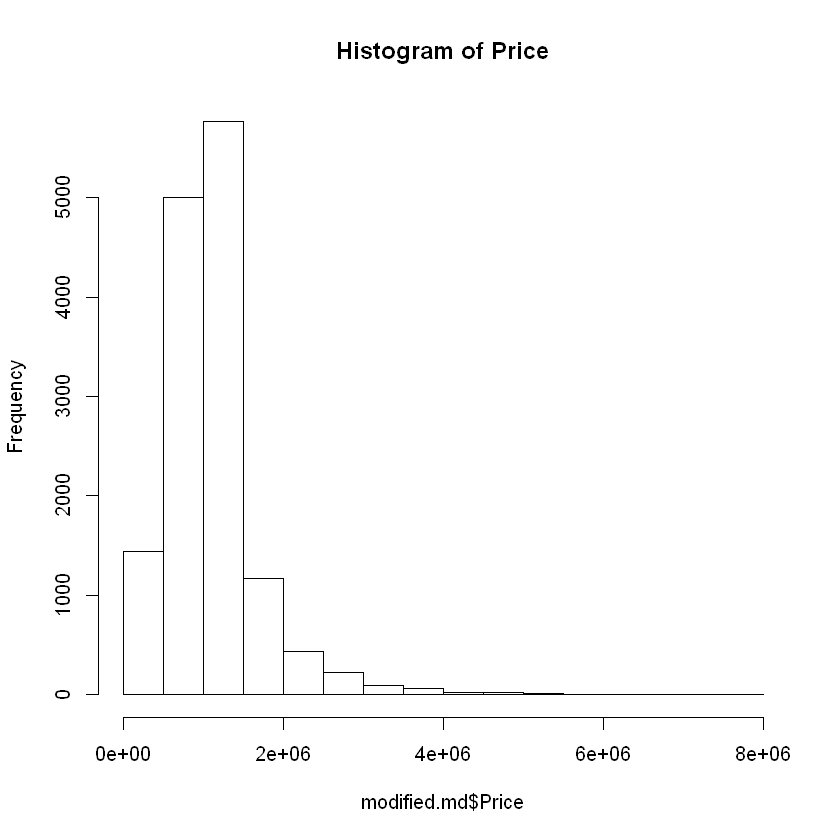

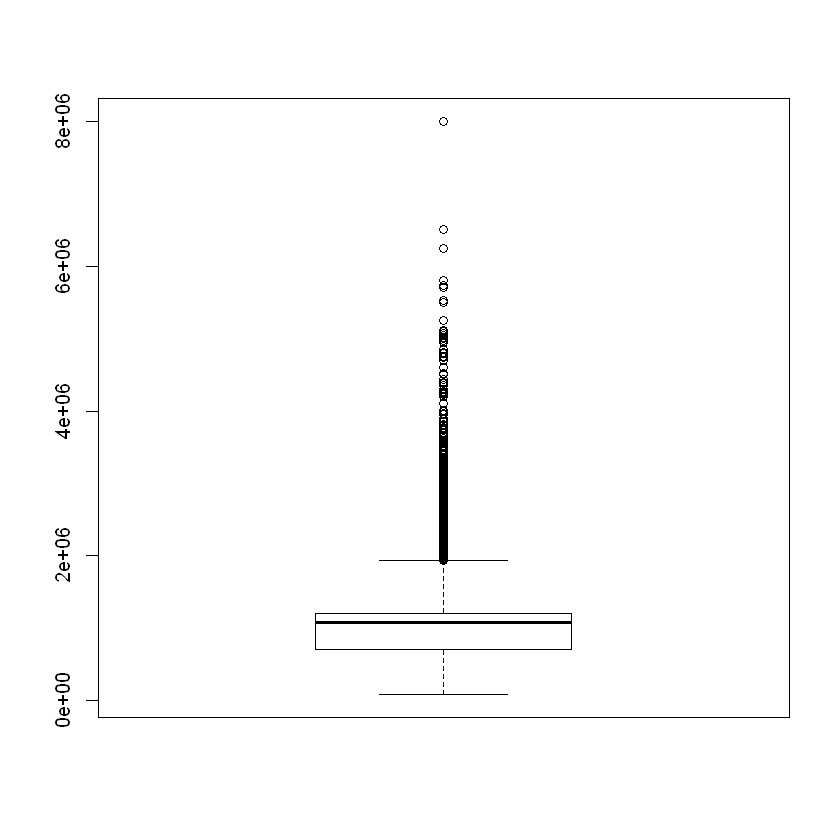

    Suburb            Address              Rooms            Type          
 Length:13618       Length:13618       Min.   : 1.000   Length:13618      
 Class :character   Class :character   1st Qu.: 2.000   Class :character  
 Mode  :character   Mode  :character   Median : 3.000   Mode  :character  
                                       Mean   : 2.842                     
                                       3rd Qu.: 3.000                     
                                       Max.   :12.000                     
                                                                          
     Price            Method            SellerG              Date          
 Min.   :  85000   Length:13618       Length:13618       Length:13618      
 1st Qu.: 692625   Class :character   Class :character   Class :character  
 Median :1060000   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 989442                                                           
 3rd Qu.:1100000    

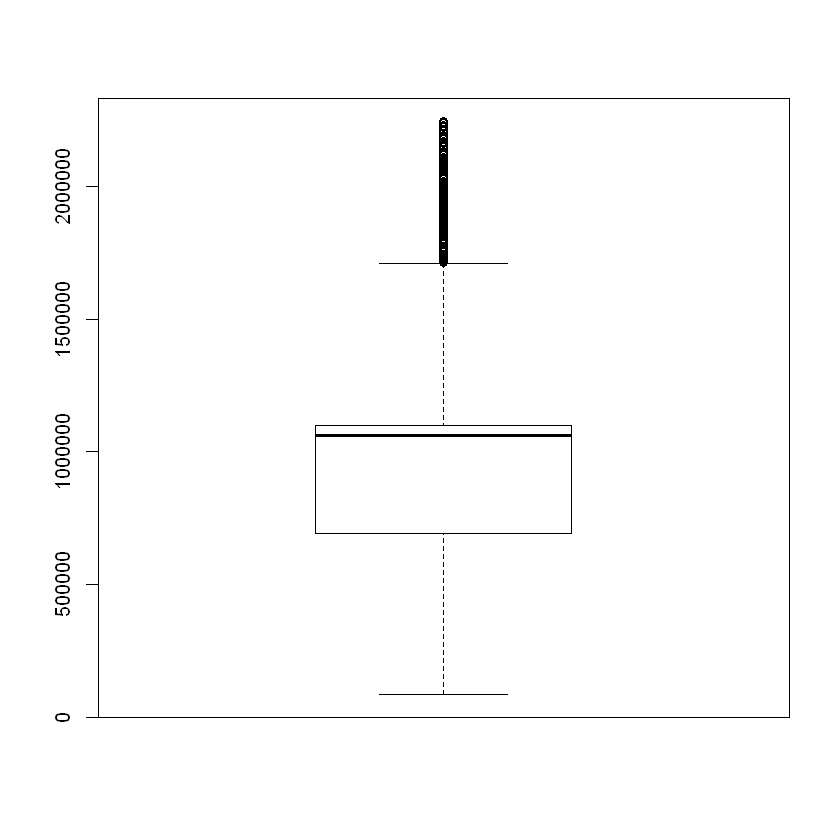

In [56]:
#excluding outliers in filled data.
hist(modified.md$Price,     main = "Histogram of Price")
boxplot(melbourne.data$Price,PLOT=TRUE)
 modified.md1 <- subset(melbourne.data, Price < 2250000)
boxplot(modified.md1$Price)
summary(modified.md1)

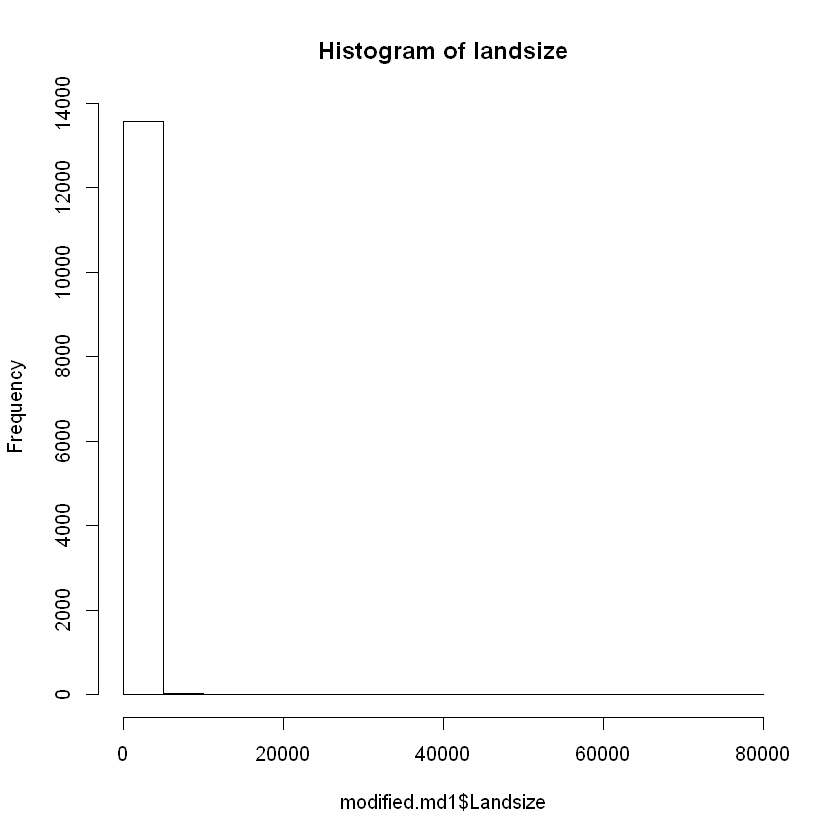

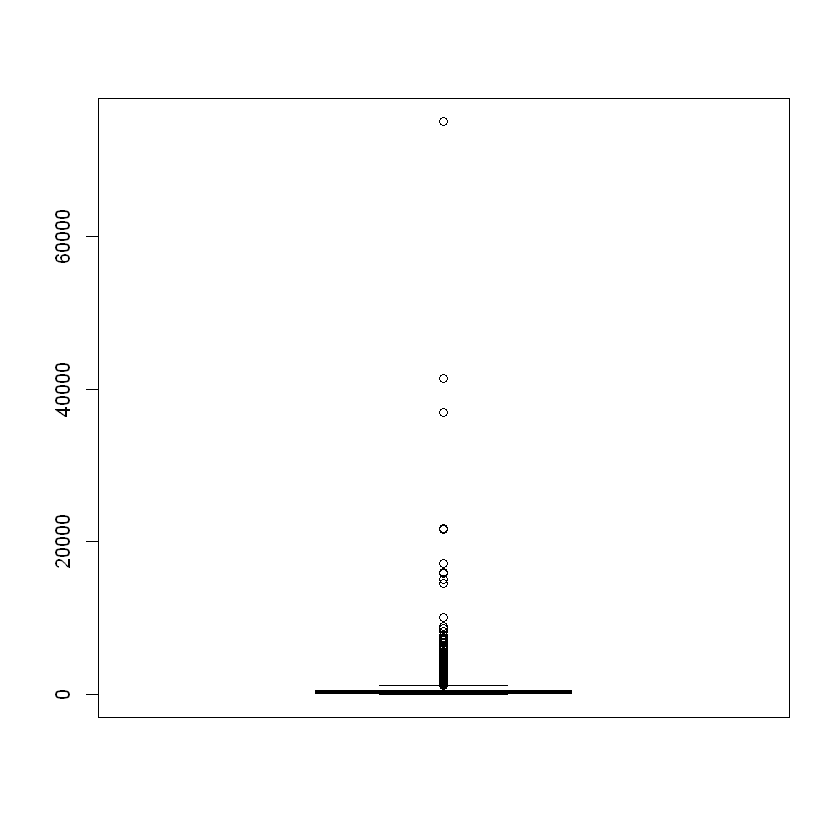

'data.frame':	11028 obs. of  19 variables:
 $ Suburb      : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address     : chr  "68 Studley St" "85 Turner St" "25 Bloomburg St" "5 Charles St" ...
 $ Rooms       : num  2 2 2 3 4 4 2 2 2 3 ...
 $ Type        : chr  "h" "h" "h" "h" ...
 $ Price       : num  1076961 1480000 1035000 1465000 1600000 ...
 $ Method      : chr  "SS" "S" "S" "SP" ...
 $ SellerG     : chr  "Jellis" "Biggin" "Biggin" "Biggin" ...
 $ Date        : chr  "03-09-2016" "03-12-2016" "04-02-2016" "04-03-2017" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : num  2 2 2 3 3 3 4 3 2 4 ...
 $ Bathroom    : num  1 1 1 2 1 2 1 2 1 2 ...
 $ Car         : num  1 1 0 0 2 2 2 1 0 0 ...
 $ Landsize    : num  126 202 156 134 120 400 201 202 181 245 ...
 $ BuildingArea: num  147 147 79 150 142 ...
 $ YearBuilt   : num  1970 1970 1900 1900 2014 ...
 $ Counci

    Suburb            Address              Rooms            Type          
 Length:11028       Length:11028       Min.   : 1.000   Length:11028      
 Class :character   Class :character   1st Qu.: 2.000   Class :character  
 Mode  :character   Mode  :character   Median : 3.000   Mode  :character  
                                       Mean   : 3.033                     
                                       3rd Qu.: 4.000                     
                                       Max.   :12.000                     
                                                                          
     Price            Method            SellerG              Date          
 Min.   : 131000   Length:11028       Length:11028       Length:11028      
 1st Qu.: 780000   Class :character   Class :character   Class :character  
 Median :1076961   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1049188                                                           
 3rd Qu.:1200000    

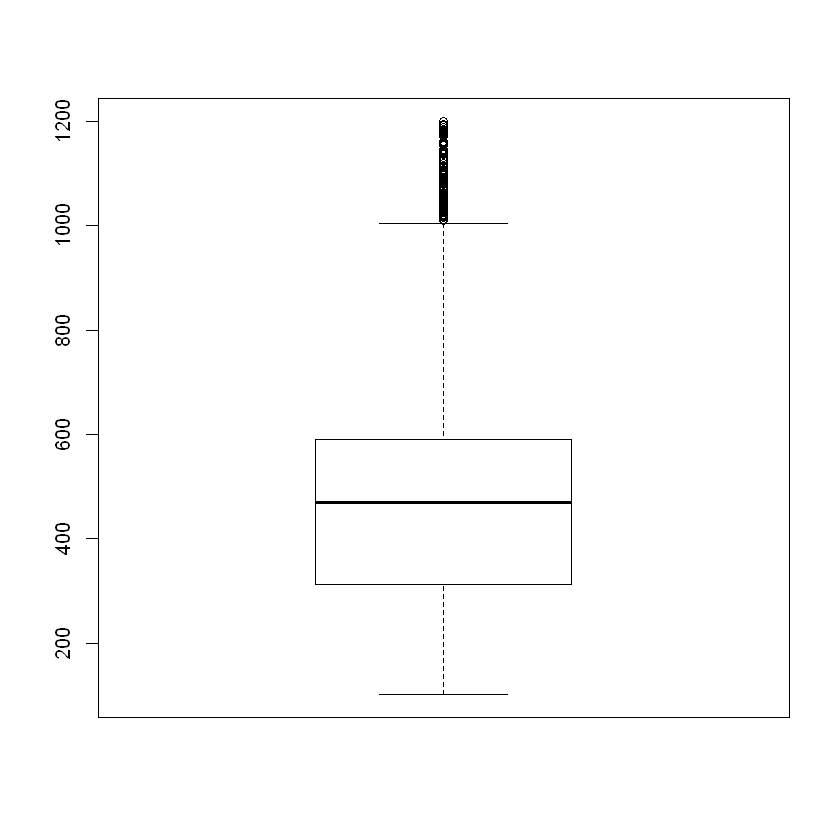

In [54]:
 hist(modified.md1$Landsize,main="Histogram of landsize")
boxplot(modified.md1$Landsize)
modified.md2 <- subset(modified.md1, Landsize < 1201)
modified.md2 <- subset(modified.md2,Landsize>100)
boxplot(modified.md2$Landsize)
 str(modified.md2)
summary(modified.md2)

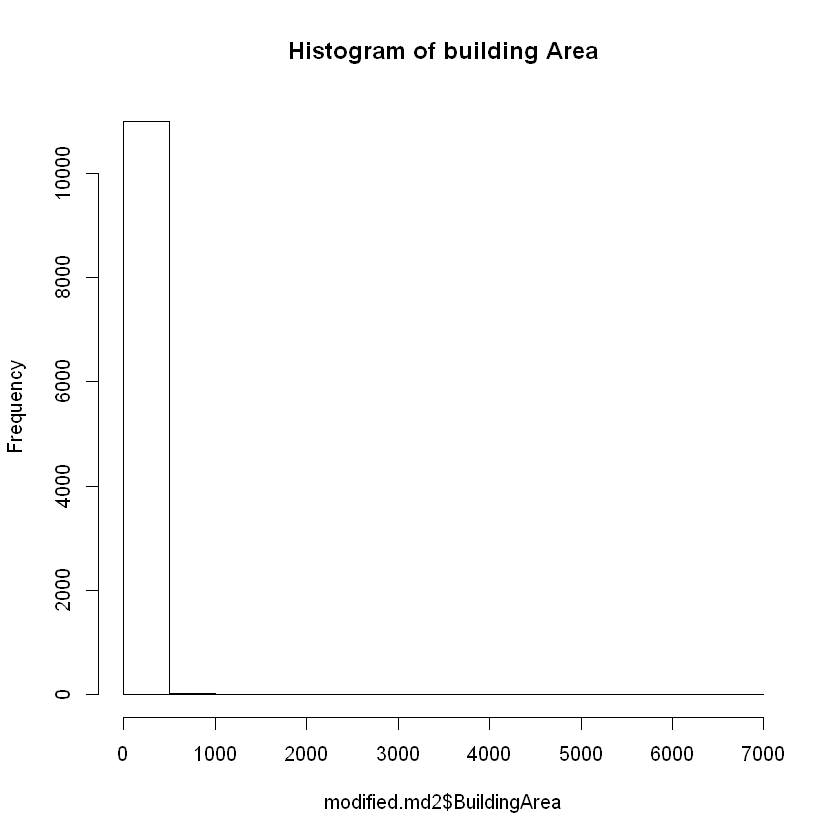

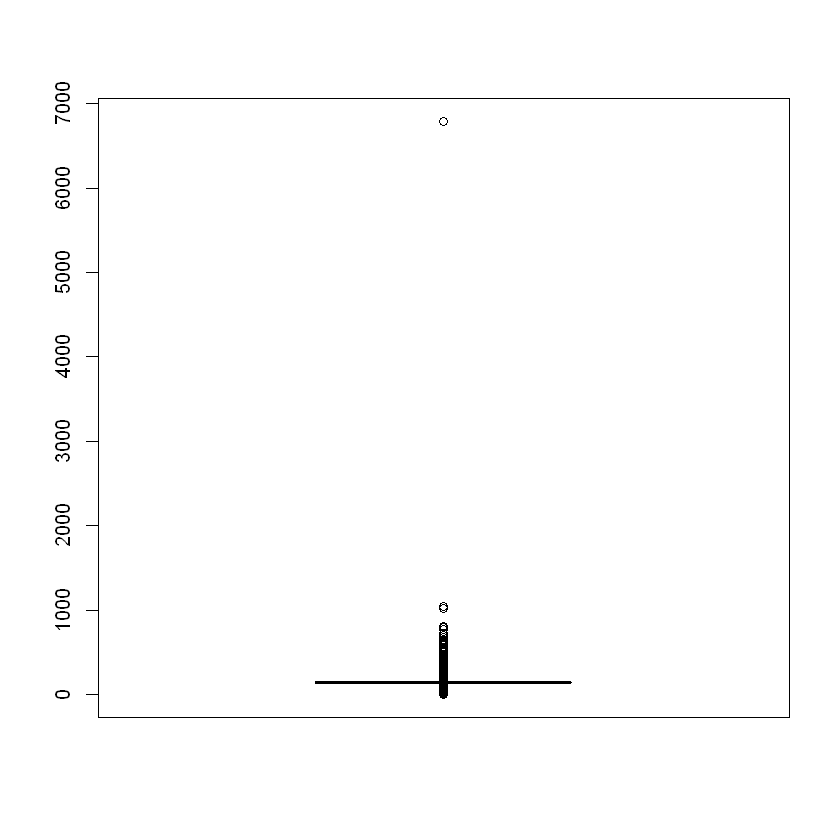

'data.frame':	10774 obs. of  19 variables:
 $ Suburb      : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address     : chr  "68 Studley St" "85 Turner St" "25 Bloomburg St" "5 Charles St" ...
 $ Rooms       : num  2 2 2 3 4 4 2 2 2 3 ...
 $ Type        : chr  "h" "h" "h" "h" ...
 $ Price       : num  1076961 1480000 1035000 1465000 1600000 ...
 $ Method      : chr  "SS" "S" "S" "SP" ...
 $ SellerG     : chr  "Jellis" "Biggin" "Biggin" "Biggin" ...
 $ Date        : chr  "03-09-2016" "03-12-2016" "04-02-2016" "04-03-2017" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : num  2 2 2 3 3 3 4 3 2 4 ...
 $ Bathroom    : num  1 1 1 2 1 2 1 2 1 2 ...
 $ Car         : num  1 1 0 0 2 2 2 1 0 0 ...
 $ Landsize    : num  126 202 156 134 120 400 201 202 181 245 ...
 $ BuildingArea: num  147 147 79 150 142 ...
 $ YearBuilt   : num  1970 1970 1900 1900 2014 ...
 $ Counci

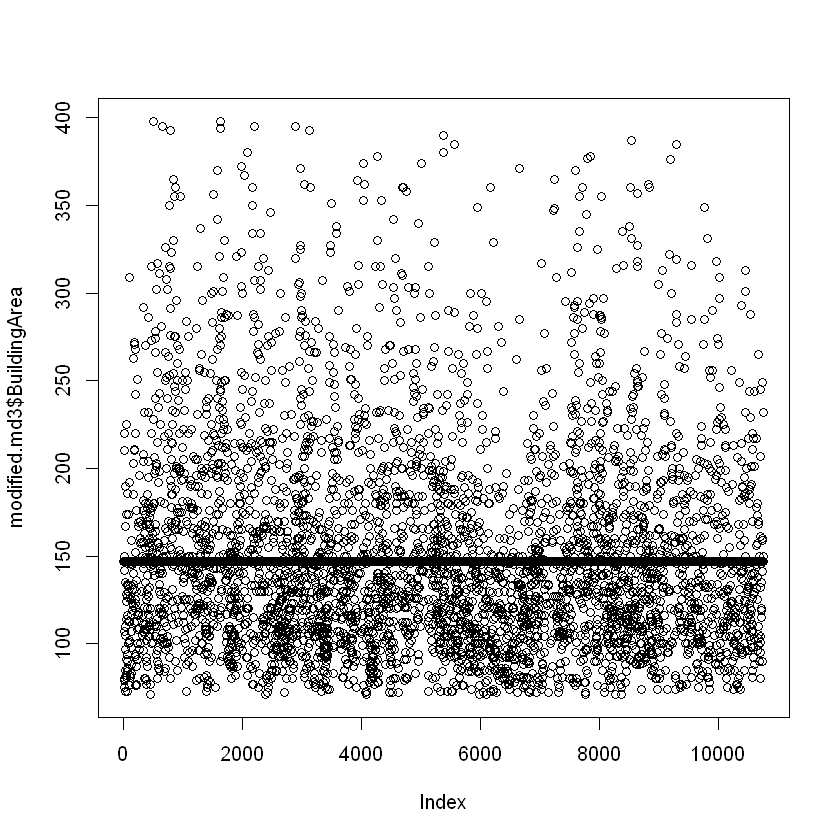

In [47]:
hist(modified.md2$BuildingArea,main='Histogram of building Area')
boxplot(modified.md2$BuildingArea)
modified.md3 <- subset(modified.md2, BuildingArea < 401)
modified.md3 <- subset(modified.md3, BuildingArea >70)
plot(modified.md3$BuildingArea)
str(modified.md3)

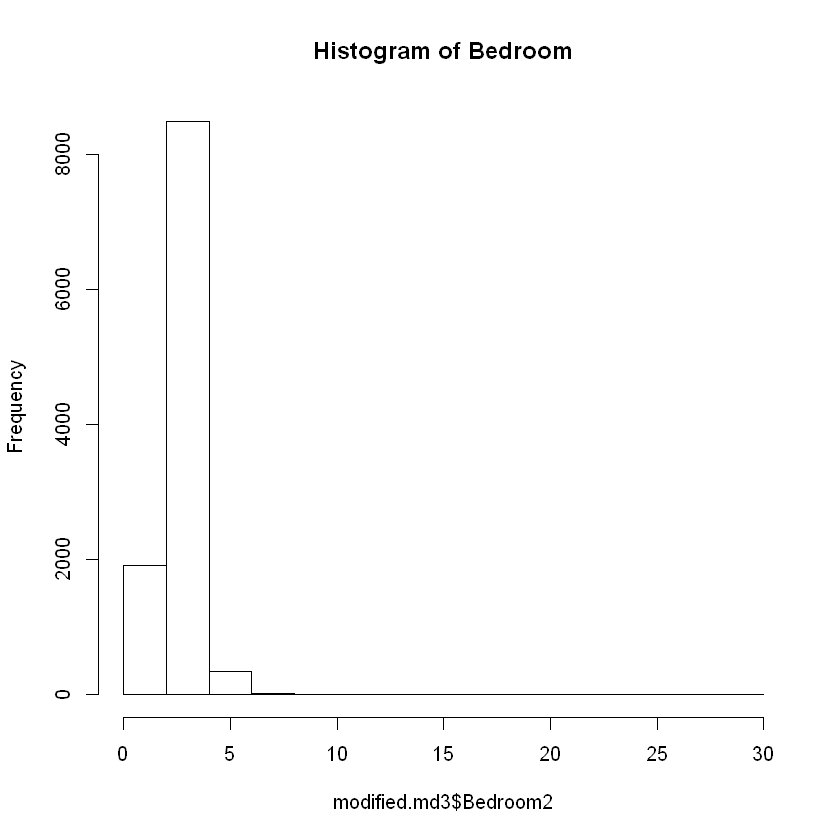

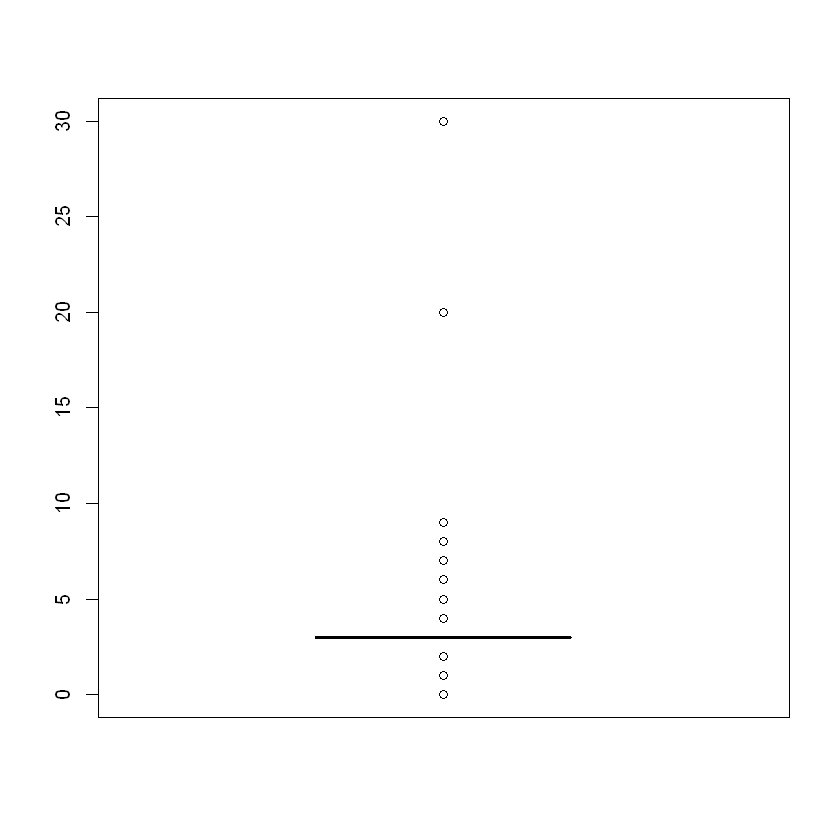

'data.frame':	10406 obs. of  19 variables:
 $ Suburb      : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address     : chr  "68 Studley St" "85 Turner St" "25 Bloomburg St" "5 Charles St" ...
 $ Rooms       : num  2 2 2 3 4 4 2 2 2 3 ...
 $ Type        : chr  "h" "h" "h" "h" ...
 $ Price       : num  1076961 1480000 1035000 1465000 1600000 ...
 $ Method      : chr  "SS" "S" "S" "SP" ...
 $ SellerG     : chr  "Jellis" "Biggin" "Biggin" "Biggin" ...
 $ Date        : chr  "03-09-2016" "03-12-2016" "04-02-2016" "04-03-2017" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : num  2 2 2 3 3 3 4 3 2 4 ...
 $ Bathroom    : num  1 1 1 2 1 2 1 2 1 2 ...
 $ Car         : num  1 1 0 0 2 2 2 1 0 0 ...
 $ Landsize    : num  126 202 156 134 120 400 201 202 181 245 ...
 $ BuildingArea: num  147 147 79 150 142 ...
 $ YearBuilt   : num  1970 1970 1900 1900 2014 ...
 $ Counci

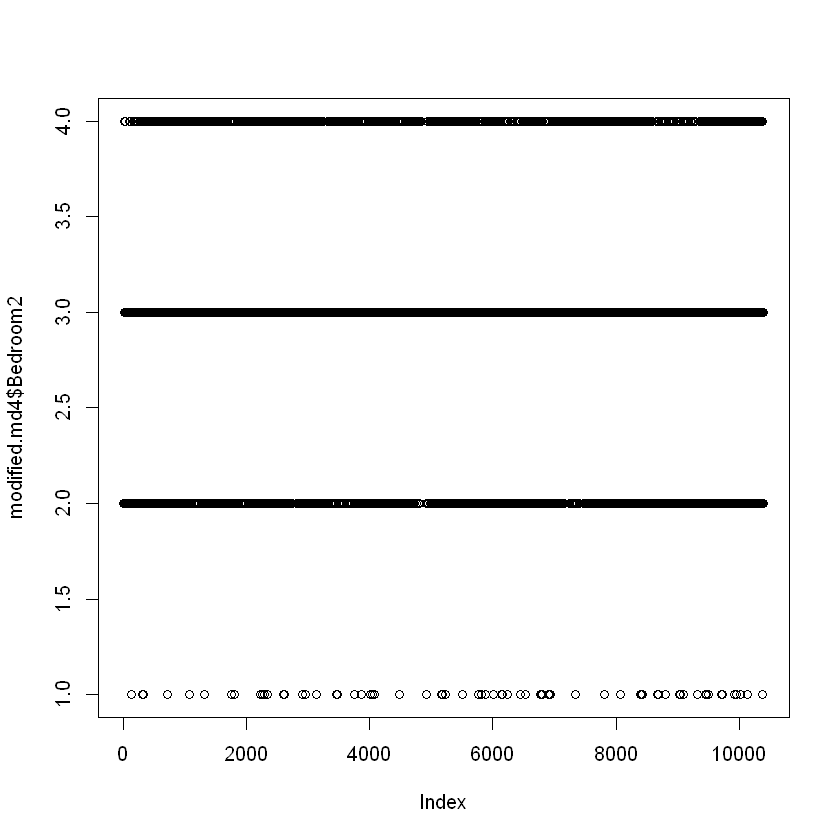

In [48]:
 hist(modified.md3$Bedroom2,main='Histogram of Bedroom')
 boxplot(modified.md3$Bedroom2)
modified.md4 <- subset(modified.md3, Bedroom2 < 5)
modified.md4 <- subset(modified.md4, Bedroom2 >0)
plot(modified.md4$Bedroom2)
str(modified.md4)

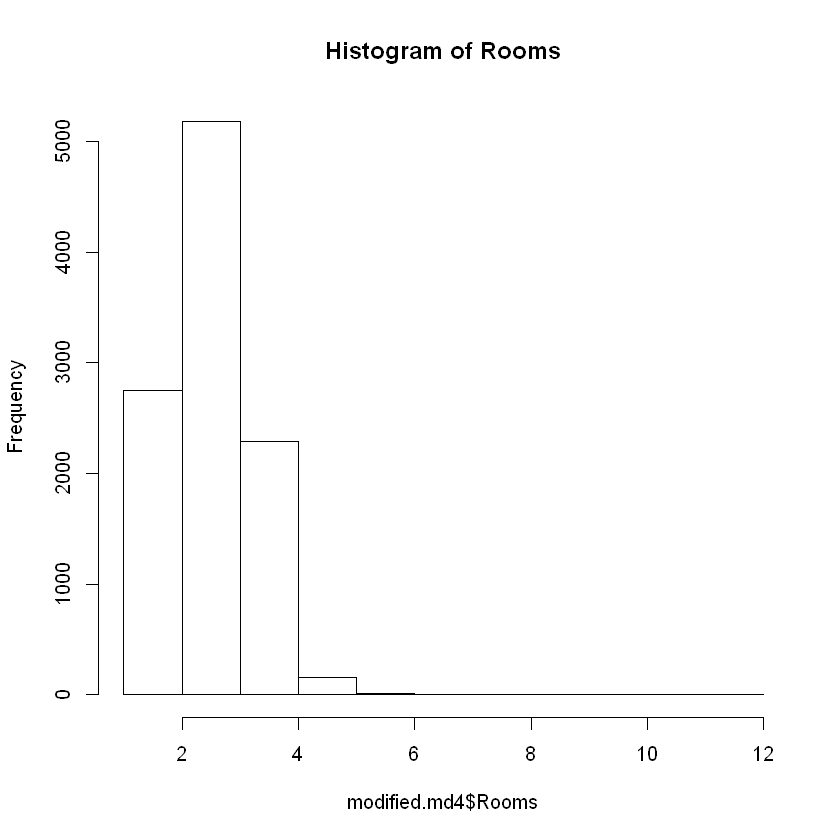

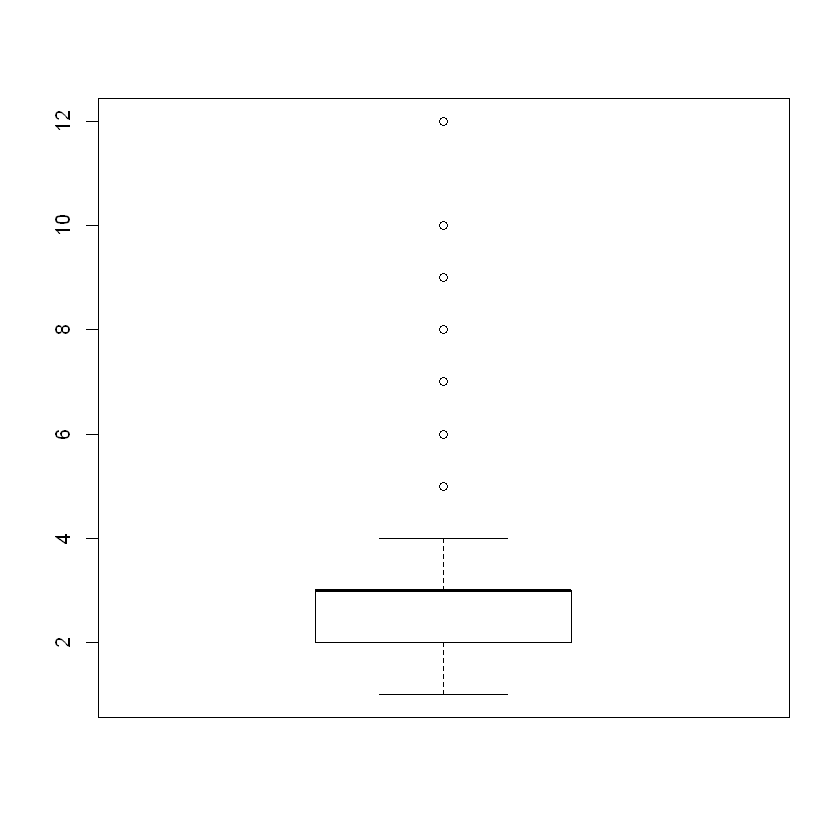

'data.frame':	10226 obs. of  19 variables:
 $ Suburb      : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address     : chr  "68 Studley St" "85 Turner St" "25 Bloomburg St" "5 Charles St" ...
 $ Rooms       : num  2 2 2 3 4 4 2 2 2 3 ...
 $ Type        : chr  "h" "h" "h" "h" ...
 $ Price       : num  1076961 1480000 1035000 1465000 1600000 ...
 $ Method      : chr  "SS" "S" "S" "SP" ...
 $ SellerG     : chr  "Jellis" "Biggin" "Biggin" "Biggin" ...
 $ Date        : chr  "03-09-2016" "03-12-2016" "04-02-2016" "04-03-2017" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : num  2 2 2 3 3 3 4 3 2 4 ...
 $ Bathroom    : num  1 1 1 2 1 2 1 2 1 2 ...
 $ Car         : num  1 1 0 0 2 2 2 1 0 0 ...
 $ Landsize    : num  126 202 156 134 120 400 201 202 181 245 ...
 $ BuildingArea: num  147 147 79 150 142 ...
 $ YearBuilt   : num  1970 1970 1900 1900 2014 ...
 $ Counci

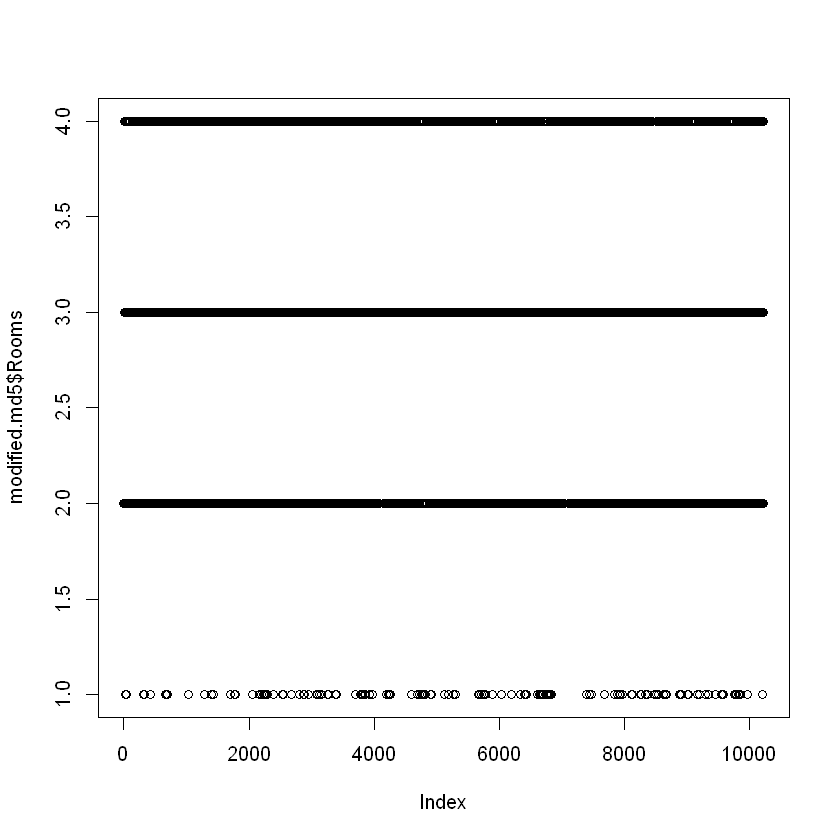

In [49]:
hist(modified.md4$Rooms,main='Histogram of Rooms')
boxplot(modified.md4$Rooms)
modified.md5 <- subset(modified.md4, Rooms < 5)
plot(modified.md5$Rooms)
str(modified.md5)


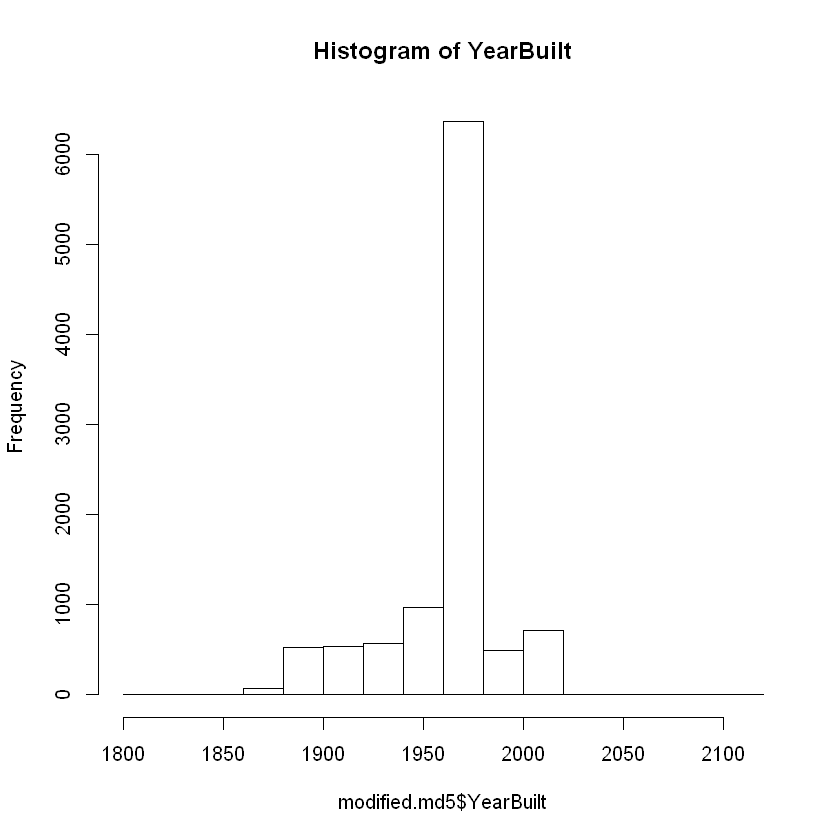


1800 1857 1860 1863 1870 1875 1880 1881 1883 1885 1886 1887 1888 1889 1890 1893 
   1    1    2    1    2    1   62    1    1    6    2    1    4    1  192    1 
1894 1895 1896 1898 1900 1902 1904 1905 1906 1908 1910 1911 1912 1913 1914 1915 
   1    2    1    2  303    1    2   15    3    1  211    1    4    3    1   51 
1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 
   3    2    4    3  232    2    3    4    4   79    6    5    4    3  218    1 
1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1943 1945 1946 1947 1948 1949 
   1    1    3   39    1    3   16    4  175    3    4   26    3    4   11    5 
1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 
 447    3    2    3    1   64    6    4    9    1  367    3    4    2    3   76 
1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 
   6    7   14    6 6004    2    6    3    6   79    6    5    9    1  121    1 
1982 1983 1984 1985 1986 19

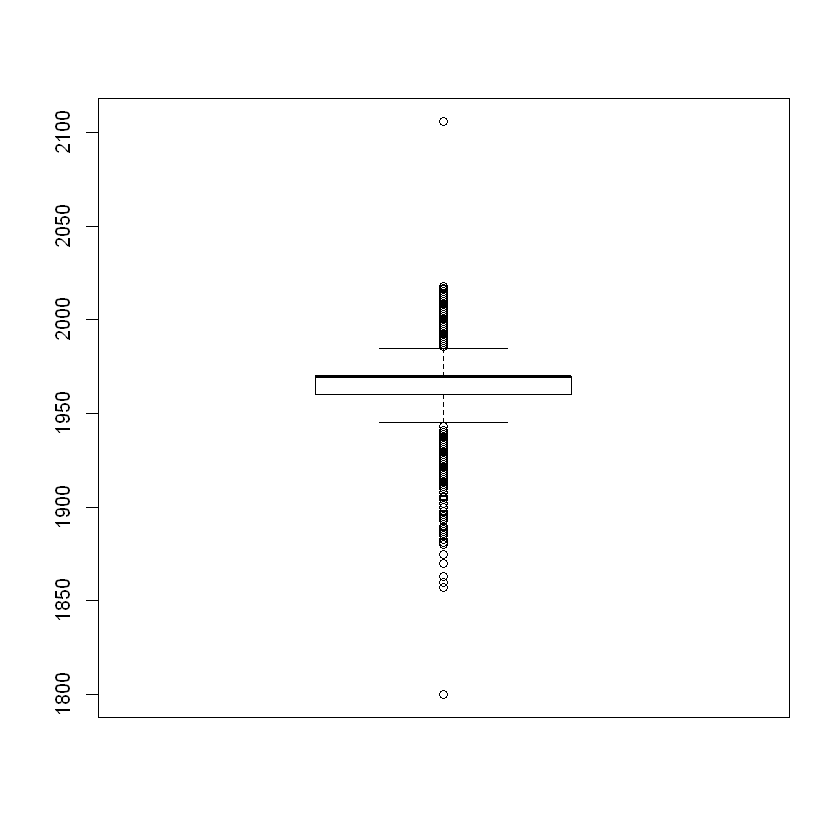


1890 1893 1894 1895 1896 1898 1900 1902 1904 1905 1906 1908 1910 1911 1912 1913 
 192    1    1    2    1    2  303    1    2   15    3    1  211    1    4    3 
1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 
   1   51    3    2    4    3  232    2    3    4    4   79    6    5    4    3 
1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1943 1945 1946 1947 
 218    1    1    1    3   39    1    3   16    4  175    3    4   26    3    4 
1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 
  11    5  447    3    2    3    1   64    6    4    9    1  367    3    4    2 
1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 
   3   76    6    7   14    6 6004    2    6    3    6   79    6    5    9    1 
1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 
 121    1    1    3    3   25    6    4    7    2   80    6    8   11   14   55 
1996 1997 1998 1999 2000 20

'data.frame':	10140 obs. of  19 variables:
 $ Suburb      : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address     : chr  "68 Studley St" "85 Turner St" "25 Bloomburg St" "5 Charles St" ...
 $ Rooms       : num  2 2 2 3 4 4 2 2 2 3 ...
 $ Type        : chr  "h" "h" "h" "h" ...
 $ Price       : num  1076961 1480000 1035000 1465000 1600000 ...
 $ Method      : chr  "SS" "S" "S" "SP" ...
 $ SellerG     : chr  "Jellis" "Biggin" "Biggin" "Biggin" ...
 $ Date        : chr  "03-09-2016" "03-12-2016" "04-02-2016" "04-03-2017" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : num  2 2 2 3 3 3 4 3 2 4 ...
 $ Bathroom    : num  1 1 1 2 1 2 1 2 1 2 ...
 $ Car         : num  1 1 0 0 2 2 2 1 0 0 ...
 $ Landsize    : num  126 202 156 134 120 400 201 202 181 245 ...
 $ BuildingArea: num  147 147 79 150 142 ...
 $ YearBuilt   : num  1970 1970 1900 1900 2014 ...
 $ Counci

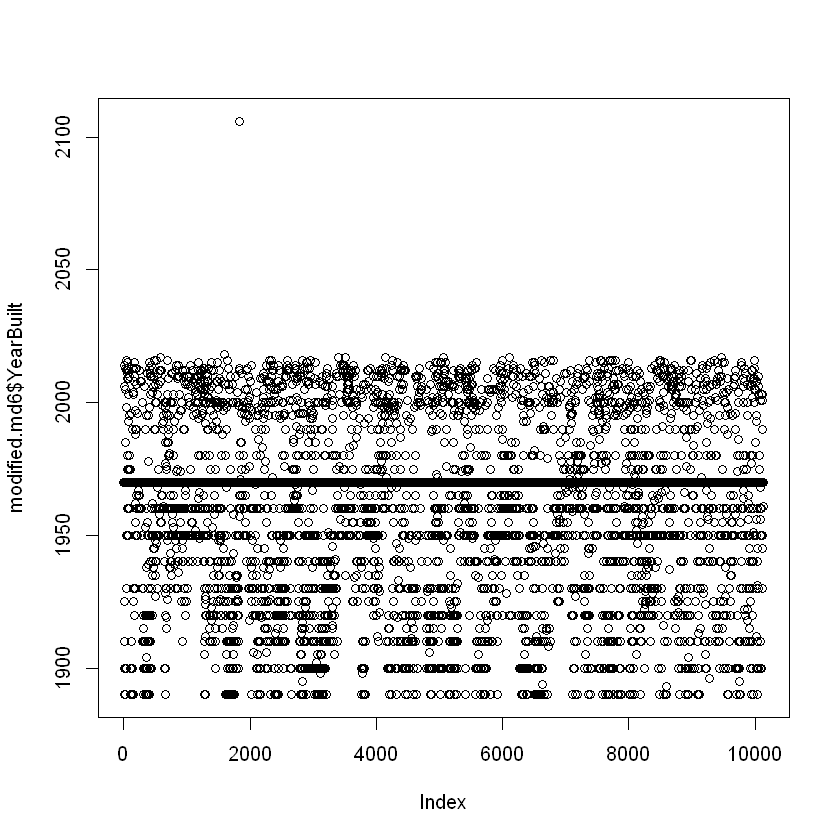

In [50]:
hist(modified.md5$YearBuilt,main='Histogram of YearBuilt')
boxplot(modified.md5$YearBuilt)
table(modified.md5$YearBuilt)
modified.md6 <- subset(modified.md5, YearBuilt > 1889)
plot(modified.md6$YearBuilt)
table(modified.md6$YearBuilt)
str(modified.md6)

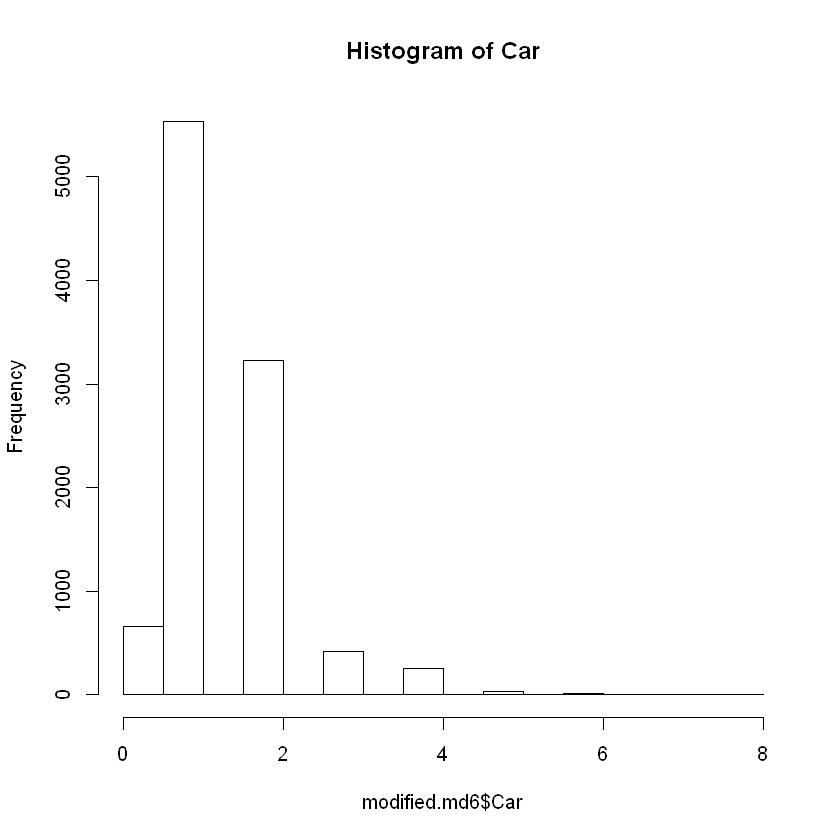


   0    1    2    3    4    5    6    7    8 
 657 5537 3227  418  250   27   16    3    5 

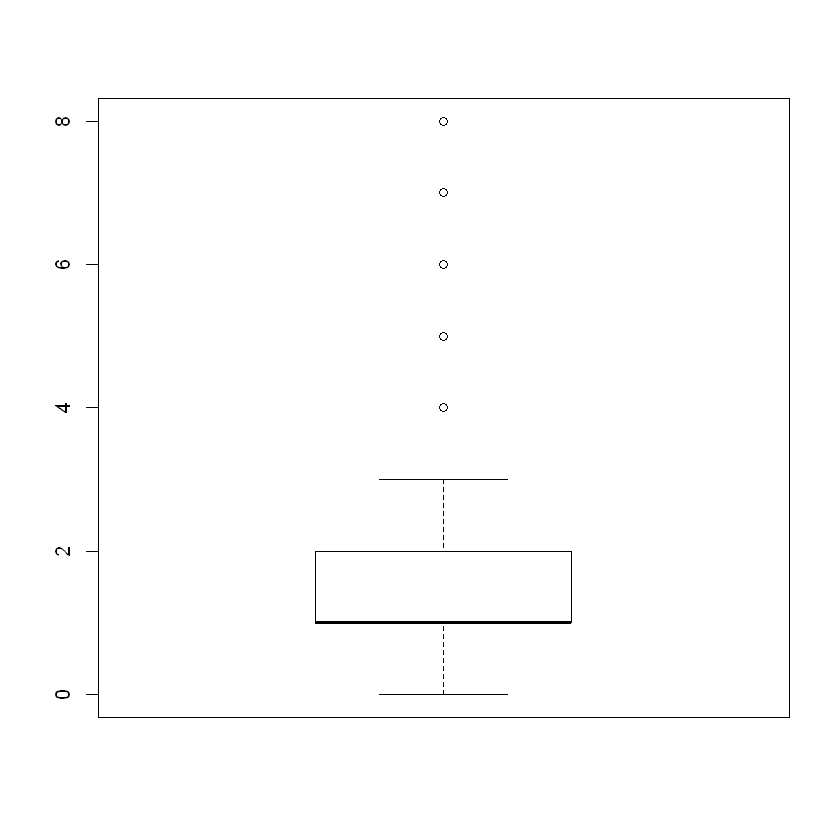

'data.frame':	10089 obs. of  16 variables:
 $ Rooms       : num  2 2 2 3 4 4 2 2 2 3 ...
 $ Type        : chr  "h" "h" "h" "h" ...
 $ Price       : num  1076961 1480000 1035000 1465000 1600000 ...
 $ Method      : chr  "SS" "S" "S" "SP" ...
 $ Date        : chr  "03-09-2016" "03-12-2016" "04-02-2016" "04-03-2017" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : num  2 2 2 3 3 3 4 3 2 4 ...
 $ Bathroom    : num  1 1 1 2 1 2 1 2 1 2 ...
 $ Car         : num  1 1 0 0 2 2 2 1 0 0 ...
 $ Landsize    : num  126 202 156 134 120 400 201 202 181 245 ...
 $ BuildingArea: num  147 147 79 150 142 ...
 $ YearBuilt   : num  1970 1970 1900 1900 2014 ...
 $ CouncilArea : chr  "Yarra" "Yarra" "Yarra" "Yarra" ...
 $ Lattitude   : num  -37.8 -37.8 -37.8 -37.8 -37.8 ...
 $ Longtitude  : num  145 145 145 145 145 ...


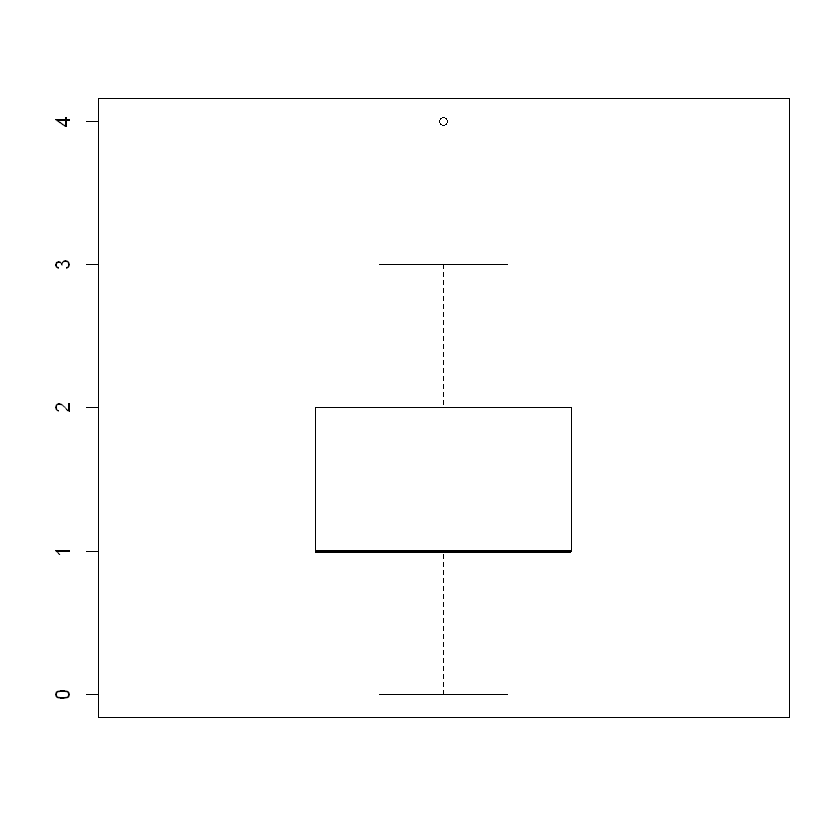

In [52]:
hist(modified.md6$Car,main='Histogram of Car')
boxplot(modified.md6$Car)
table(modified.md6$Car)
modified.md7 <- subset(modified.md6, Car <= 4)
modified.md7<- modified.md7[c(-1,-2,-7)]
boxplot(modified.md7$Car)
str(modified.md7)

In [53]:
summary(modified.md7)

     Rooms           Type               Price            Method         
 Min.   :1.000   Length:10089       Min.   : 131000   Length:10089      
 1st Qu.:2.000   Class :character   1st Qu.: 770000   Class :character  
 Median :3.000   Mode  :character   Median :1076961   Mode  :character  
 Mean   :2.931                      Mean   :1039253                     
 3rd Qu.:3.000                      3rd Qu.:1190000                     
 Max.   :4.000                      Max.   :2245000                     
                                                                        
     Date              Distance         Postcode       Bedroom2    
 Length:10089       Min.   : 1.200   Min.   :3000   Min.   :1.000  
 Class :character   1st Qu.: 6.600   1st Qu.:3044   1st Qu.:3.000  
 Mode  :character   Median : 9.200   Median :3079   Median :3.000  
                    Mean   : 9.221   Mean   :3094   Mean   :2.955  
                    3rd Qu.:11.800   3rd Qu.:3145   3rd Qu.:3.000  
        